In [6]:
path_to_final_relational_dataset_folder = '../Dataset/Final'
path_to_diagrms_folder = '../Diagrams'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [11]:
if (os.path.exists(path_to_final_relational_dataset_folder)) and (os.path.isdir(path_to_diagrms_folder)):
  print("Directory exists")
else:
  print("Directory not exists")

Directory exists


In [3]:
# Load your data
df = pd.read_csv(f'{path_to_final_relational_dataset_folder}/sentiment_codeQuality_relationship.csv')

# Remove the '%' sign and convert columns to numeric
percentage_columns = ['bug_percentage', 'security_hotspots_percentage', 'code_smells_percentage', 'duplication_percentage']

for col in percentage_columns:
    df[col] = df[col].str.rstrip('%').astype(float)

# Select columns
columns = ['positive_sentiment', 'negative_percentage', 'neutral_percentage', 
           'bug_percentage', 'security_hotspots_percentage', 'code_smells_percentage', 
           'duplication_percentage']
df = df[columns]

# Generate descriptive statistics
print(df.describe())

# Scatter plots
for metric in columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['positive_sentiment'], df[metric])
    plt.xlabel('Positive Sentiment Percentage')
    plt.ylabel(metric)
    plt.title(f'Positive Sentiment Percentage vs {metric}')
    plt.show()

# Correlation table
correlations = df.corr()
print(correlations)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bar plot for top 20 repositories based on positive sentiment
# Replace 'repository_name' with the actual column name for repository names
top_repos = df.nlargest(20, 'positive_sentiment')
plt.figure(figsize=(10, 6))
sns.barplot(x='positive_sentiment', y='repository_name', data=top_repos, orient='h')
plt.title('Top 20 Repositories Based on Positive Sentiment')
plt.xlabel('Positive Sentiment Percentage')
plt.ylabel('Repository')
plt.show()

KeyError: 'bug_percentage'

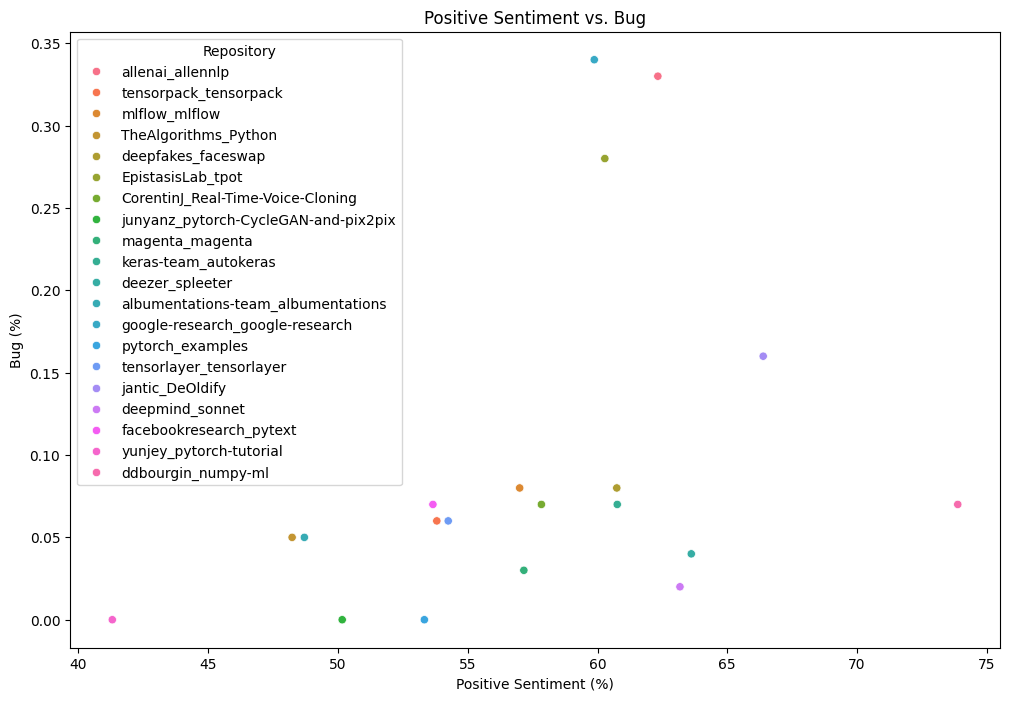

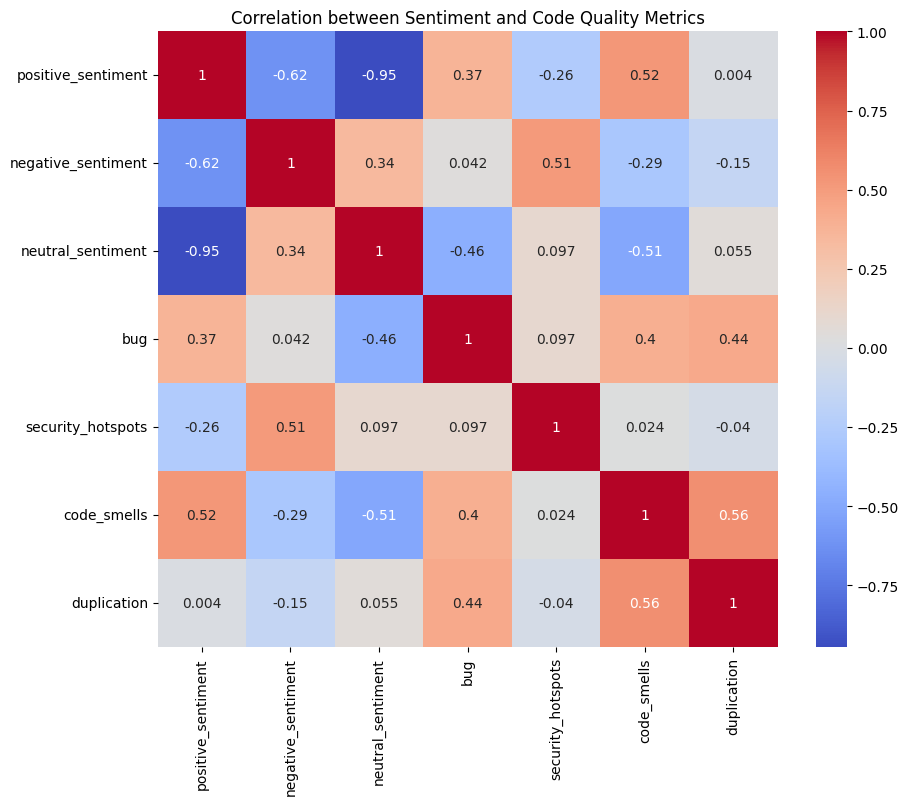

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(f'{path_to_final_relational_dataset_folder}/sentiment_codeQuality_relationship.csv')

# Remove the '%' sign and convert columns to numeric
percentage_columns = ['bug', 'security_hotspots', 'code_smells', 'duplication']

for col in percentage_columns:
    df[col] = df[col].str.rstrip('%').astype(float)

# Take the top 20 repositories
top_20_repositories = df['file_name'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 repositories
df_top_20 = df[df['file_name'].isin(top_20_repositories)]

# Scatter plot: Sentiment vs. Code Quality Metrics
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_top_20, x='positive_sentiment', y='bug', hue='file_name')
plt.title('Positive Sentiment vs. Bug')
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Bug (%)')
plt.legend(title='Repository')
plt.show()

# Heatmap: Correlation between Sentiment and Code Quality Metrics
plt.figure(figsize=(10, 8))
sns.heatmap(df_top_20[['positive_sentiment', 'negative_sentiment', 'neutral_sentiment',
                      'bug', 'security_hotspots',
                      'code_smells', 'duplication']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sentiment and Code Quality Metrics')
plt.show()



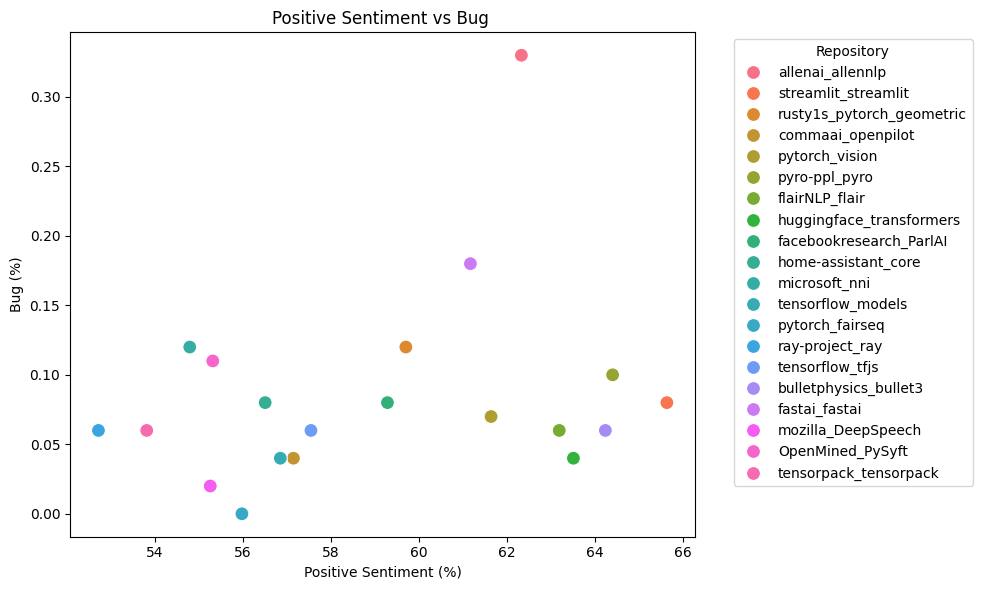

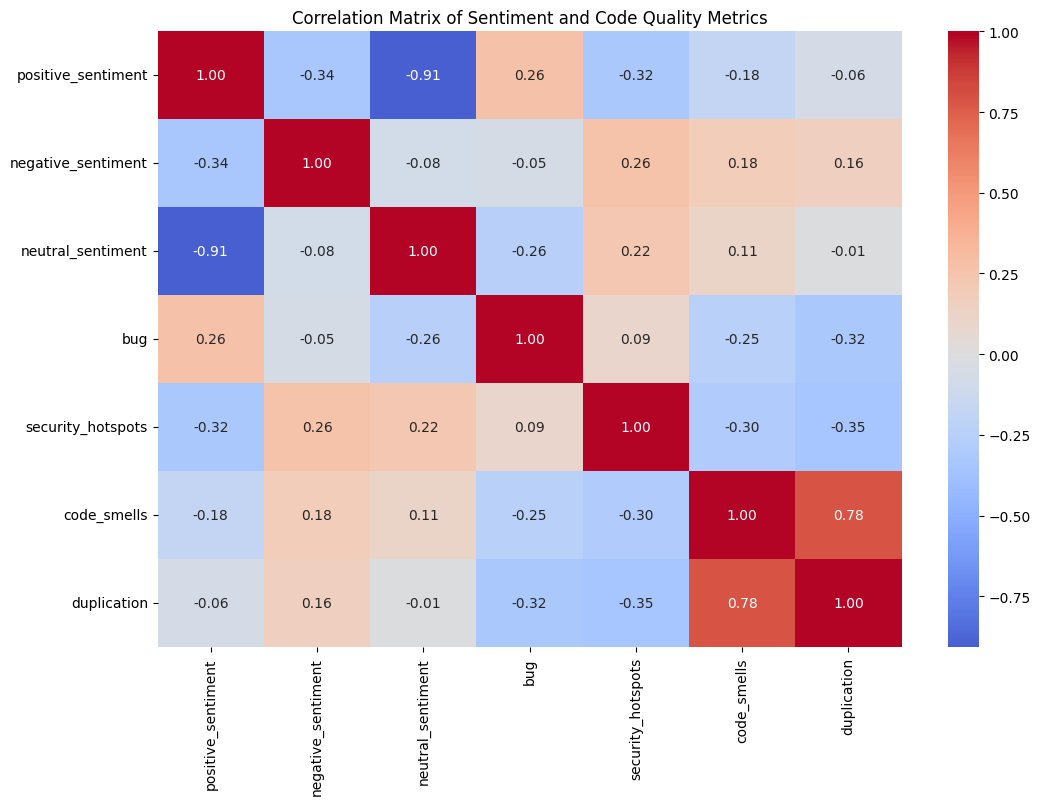

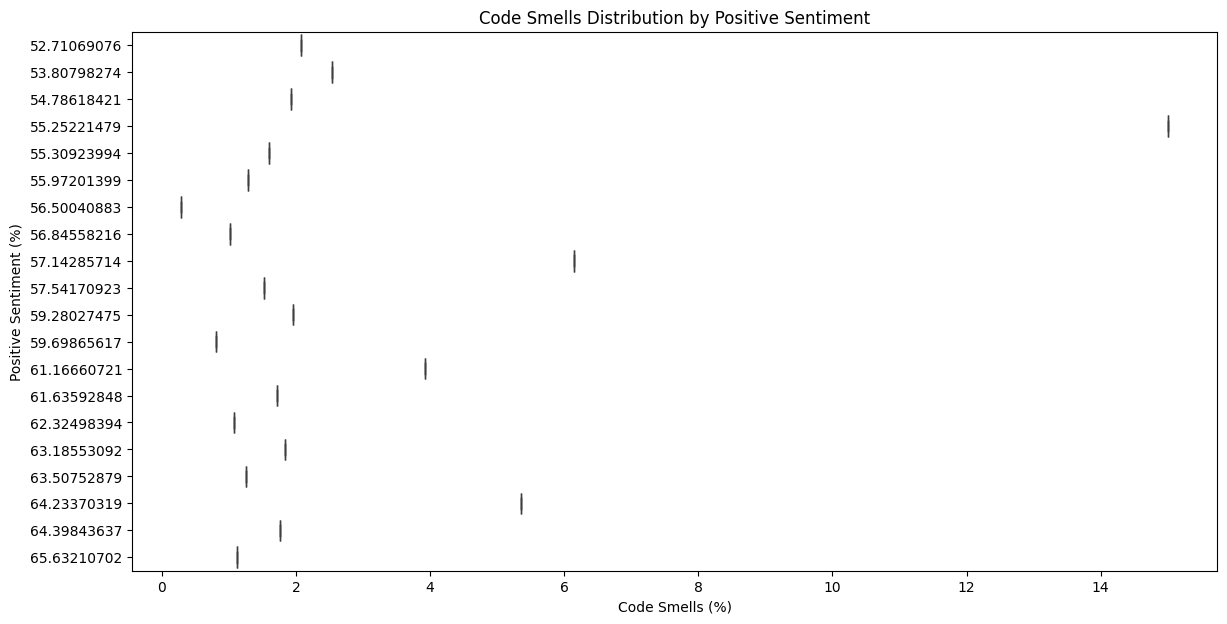

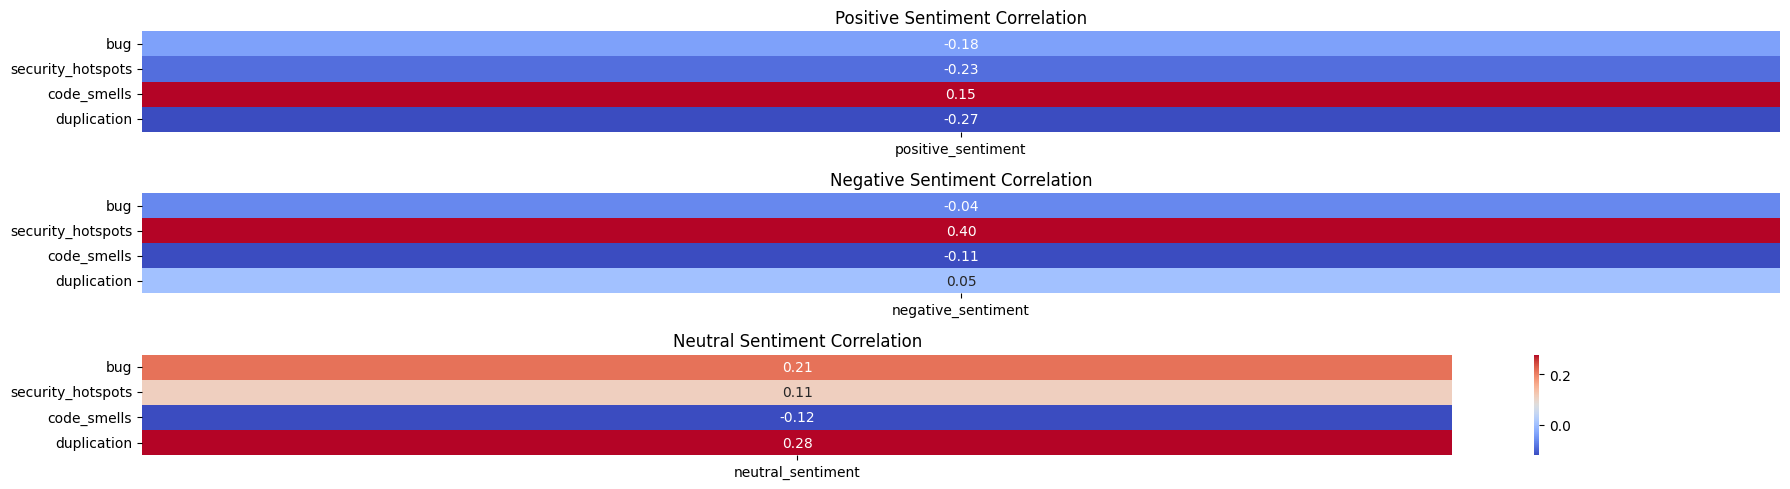

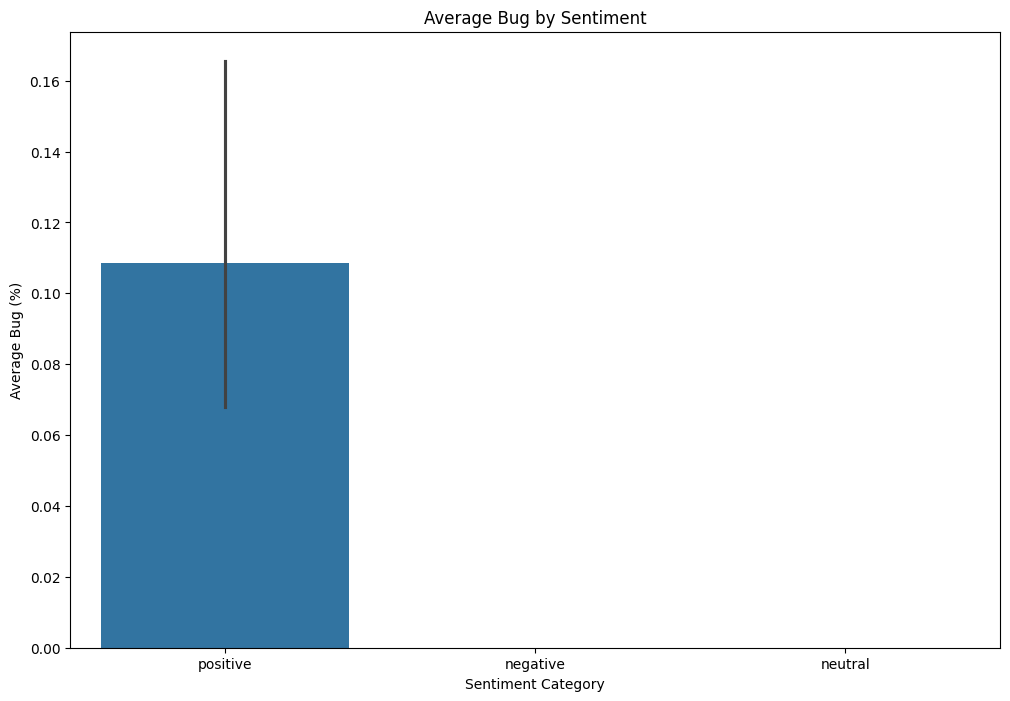

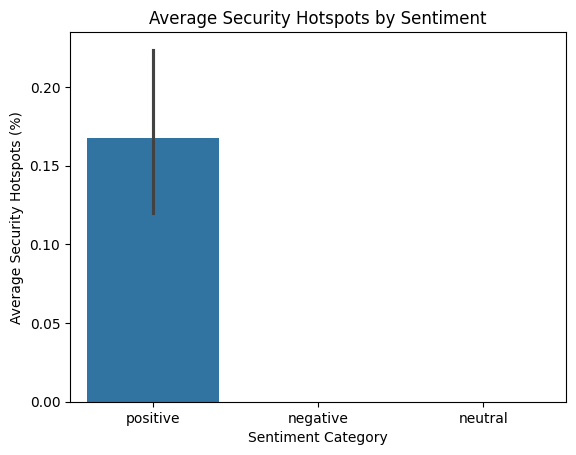

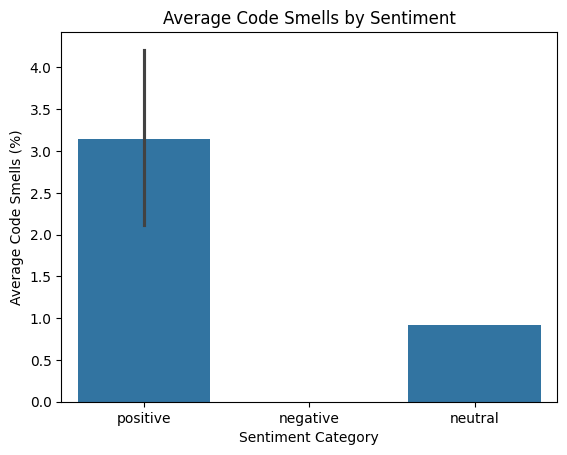

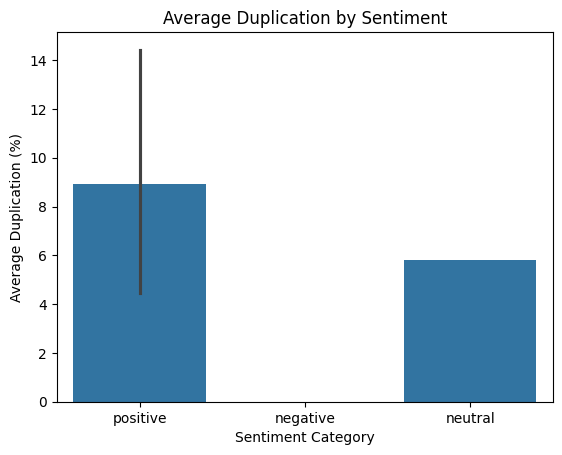

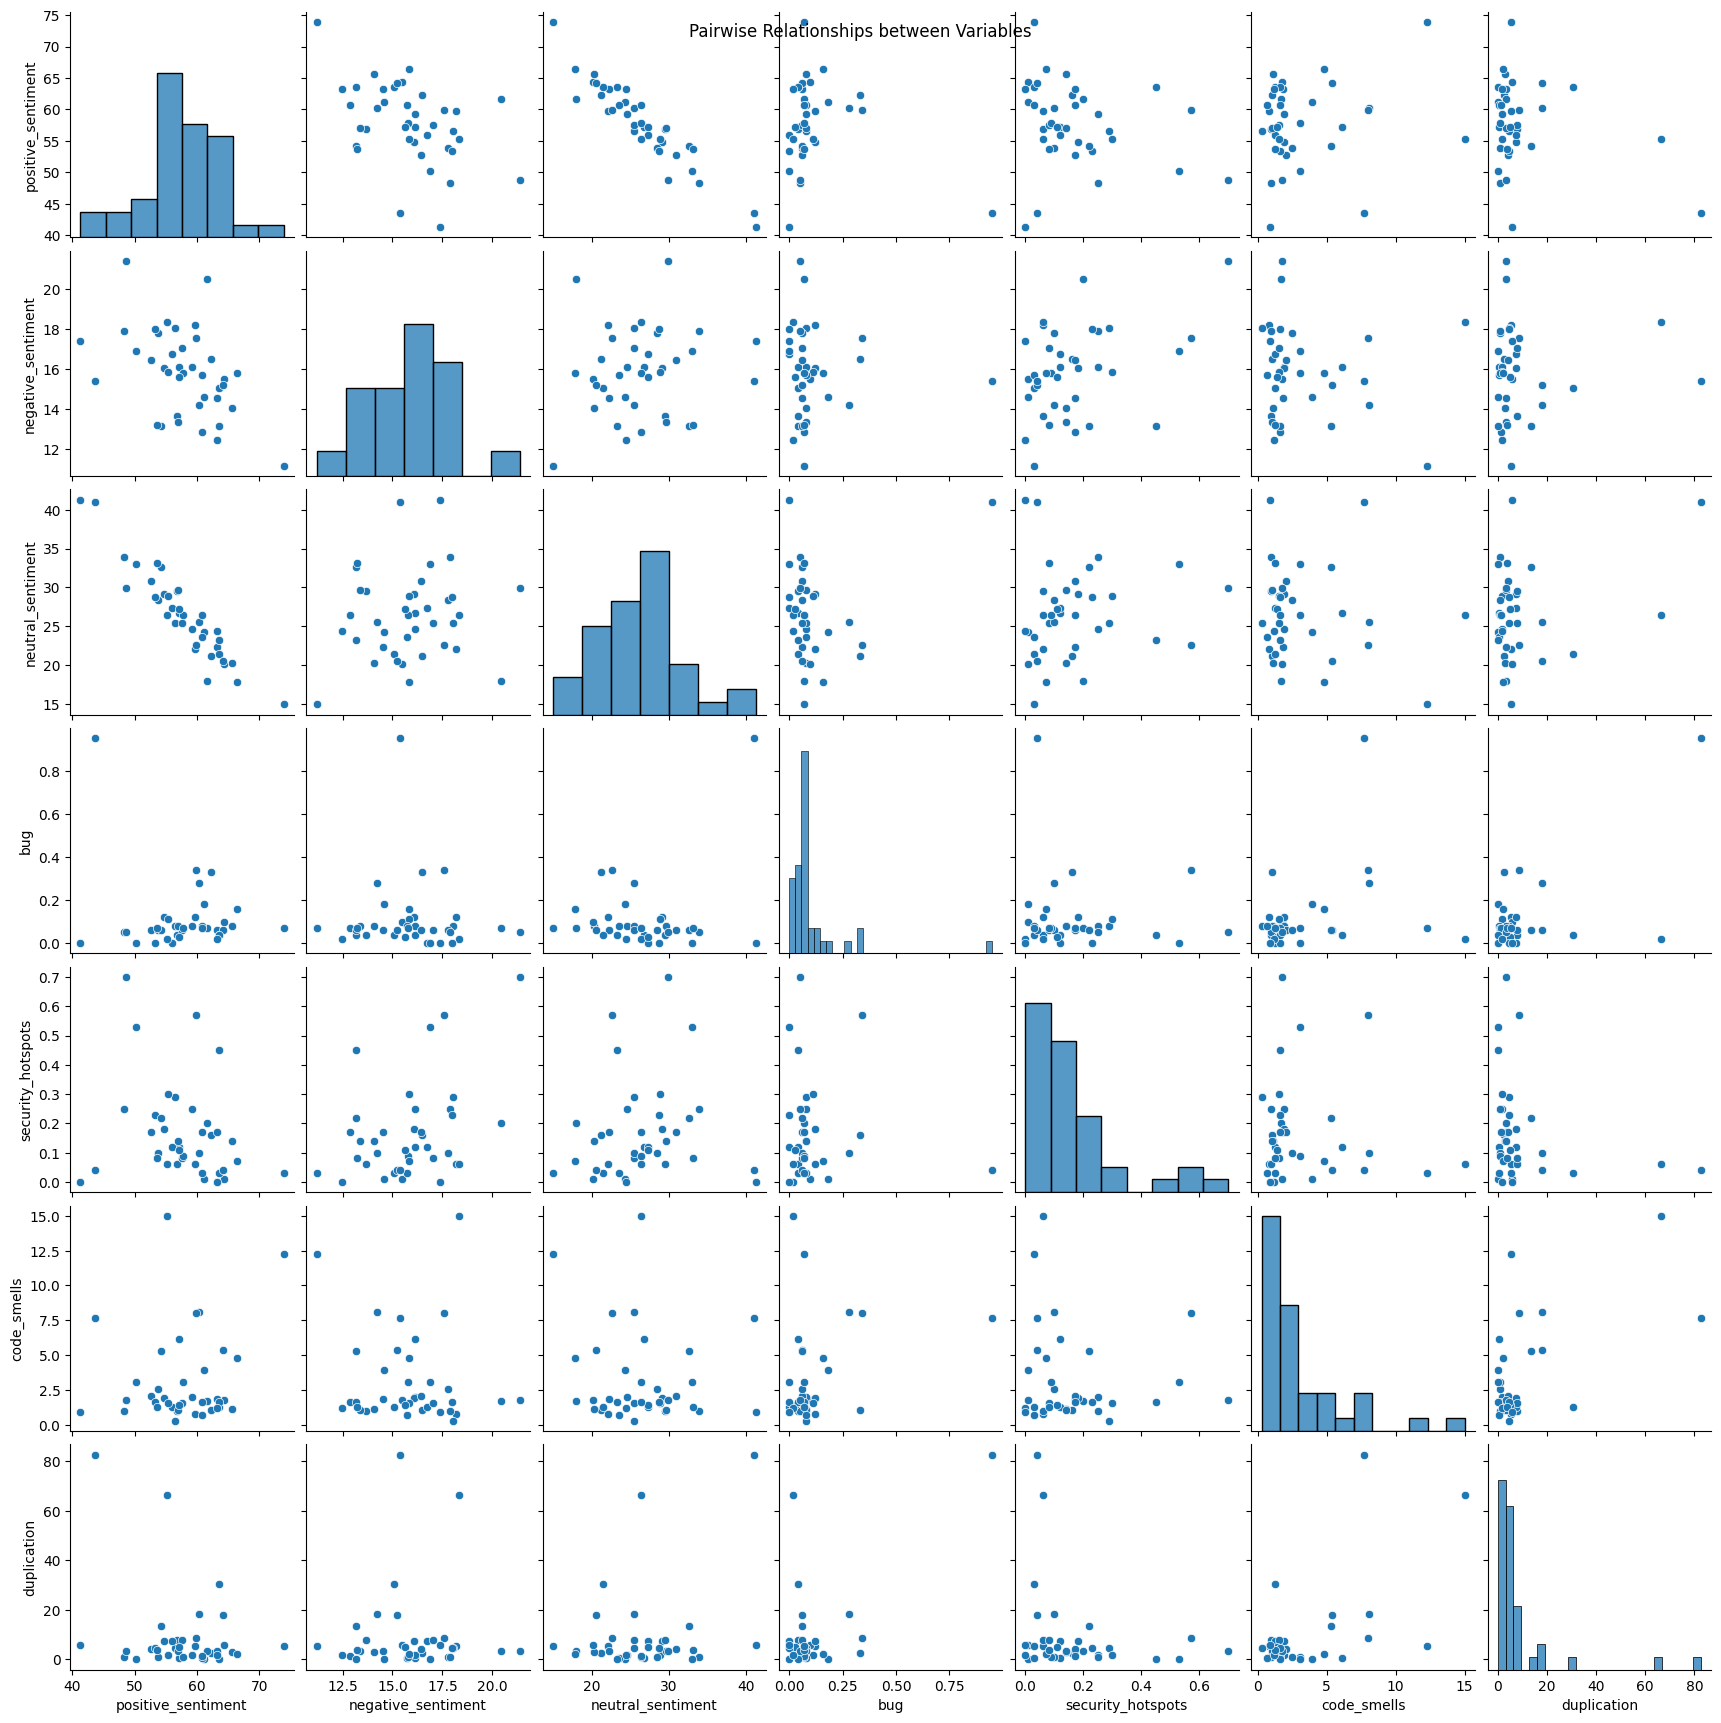

In [5]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(f'{path_to_final_relational_dataset_folder}/sentiment_codeQuality_relationship.csv')

# Remove the '%' sign and convert columns to numeric
percentage_columns = ['bug', 'security_hotspots', 'code_smells', 'duplication']

for col in percentage_columns:
    df[col] = df[col].str.rstrip('%').astype(float)

# Select the top 20 repositories based on a metric, e.g., positive_sentiment
top_repos = df.head(20)

# Scatter plot for positive sentiment vs bug percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_repos, x='positive_sentiment', y='bug', hue='file_name', s=100)
plt.title('Positive Sentiment vs Bug ')
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Bug (%)')
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Heatmap for correlation matrix
correlation_matrix = top_repos[['positive_sentiment', 'negative_sentiment', 'neutral_sentiment', 'bug', 'security_hotspots', 'code_smells', 'duplication']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sentiment and Code Quality Metrics')
plt.show()

# Box plot for code smells percentage across different sentiments
plt.figure(figsize=(14, 7))
sns.boxplot(data=top_repos, x='code_smells', y='positive_sentiment', orient='h')
plt.title('Code Smells Distribution by Positive Sentiment')
plt.xlabel('Code Smells (%)')
plt.ylabel('Positive Sentiment (%)')
plt.show()

correlations = df[['positive_sentiment', 'negative_sentiment', 'neutral_sentiment', 'bug', 'security_hotspots', 'code_smells', 'duplication']].corr()

# Separate the correlation matrix into sentiment-specific dataframes
positive_corr = correlations.loc[['positive_sentiment'], ['bug', 'security_hotspots', 'code_smells', 'duplication']].T
negative_corr = correlations.loc[['negative_sentiment'], ['bug', 'security_hotspots', 'code_smells', 'duplication']].T
neutral_corr = correlations.loc[['neutral_sentiment'], ['bug', 'security_hotspots', 'code_smells', 'duplication']].T

# Create a facet grid of heatmaps
fig, axes = plt.subplots(3, 1, figsize=(18, 5))

# Positive sentiment correlation heatmap
sns.heatmap(positive_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0], cbar=False)
axes[0].set_title('Positive Sentiment Correlation')

# Negative sentiment correlation heatmap
sns.heatmap(negative_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1], cbar=False)
axes[1].set_title('Negative Sentiment Correlation')

# Neutral sentiment correlation heatmap
sns.heatmap(neutral_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[2], cbar=True)
axes[2].set_title('Neutral Sentiment Correlation')

# Adjust layout
plt.tight_layout()
plt.show()

# Bar plot: Average Code Quality Metrics by Sentiment
plt.figure(figsize=(12, 8))
quality_metrics = ['bug', 'security_hotspots', 'code_smells', 'duplication']

# Determine sentiment category based on percentages of positive, negative, and neutral sentiment
def determine_sentiment_category(row):
    if row['positive_sentiment'] > row['negative_sentiment'] and row['positive_sentiment'] > row['neutral_sentiment']:
        return 'positive'  
    elif row['negative_sentiment'] > row['positive_sentiment'] and row['negative_sentiment'] > row['neutral_sentiment']:
        return 'negative'
    else:
        return 'neutral'

# Create 'sentiment_category' based on percentages
df['sentiment_category'] = df.apply(determine_sentiment_category, axis=1)


for metric in quality_metrics:
    sns.barplot(data=df, x='sentiment_category', y=metric, order=['positive', 'negative', 'neutral'])
    plt.title(f'Average {metric.replace("_", " ").title()} by Sentiment')
    plt.xlabel('Sentiment Category')
    plt.ylabel(f'Average {metric.replace("_", " ").title()} (%)')
    plt.show()

# Pair plot for pairwise relationships between variables
sns.pairplot(df[['positive_sentiment', 'negative_sentiment', 'neutral_sentiment',
                 'bug', 'security_hotspots',
                 'code_smells', 'duplication']])
plt.suptitle('Pairwise Relationships between Variables')
plt.show()

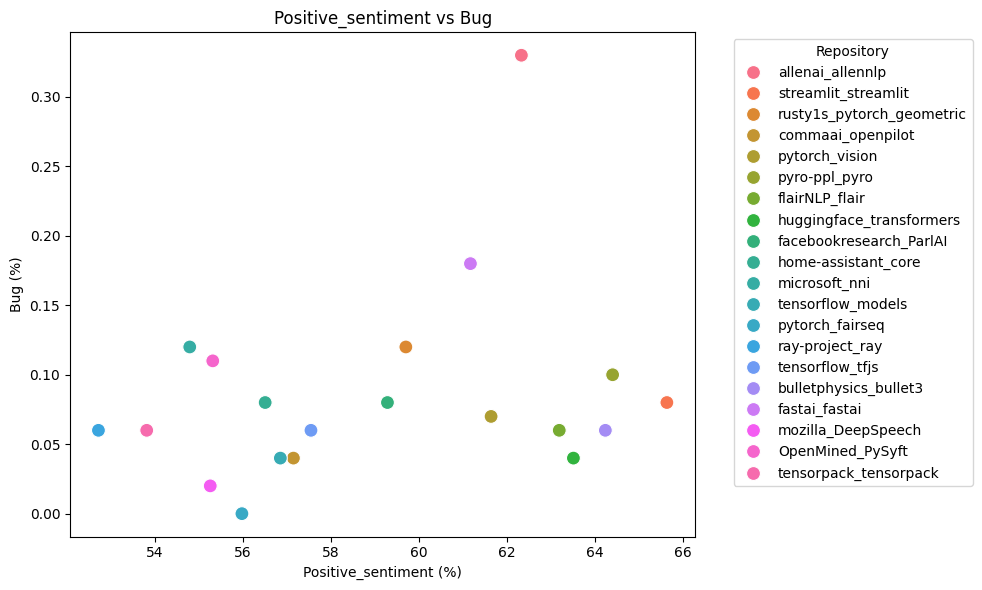

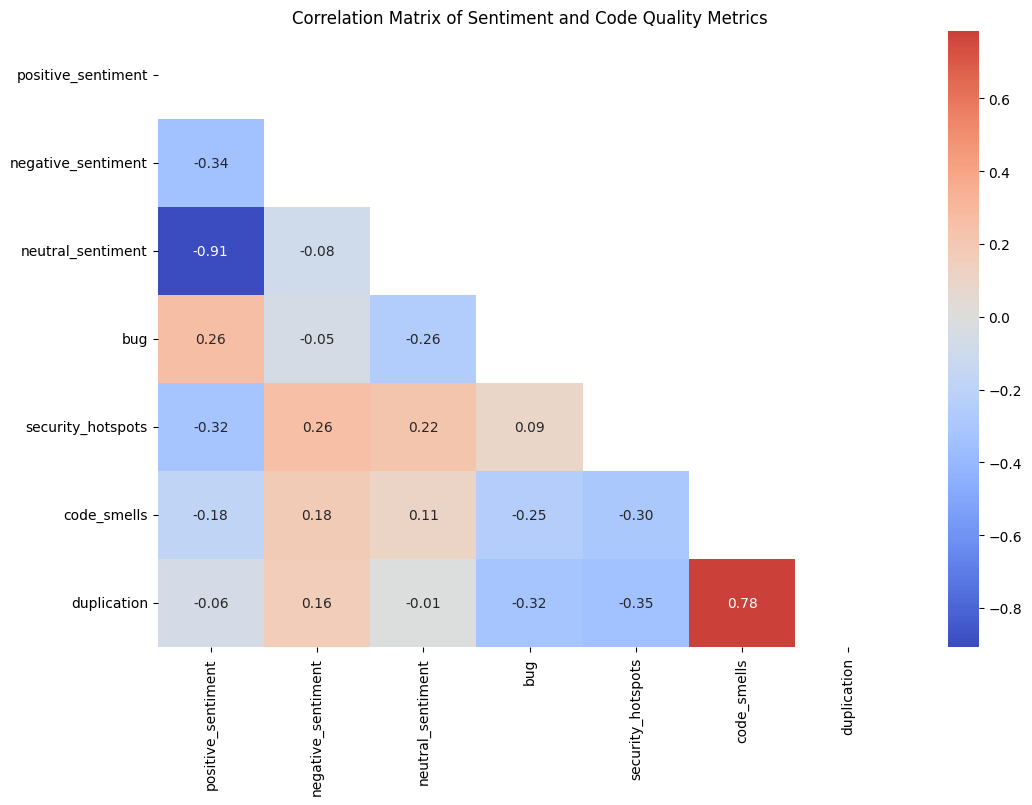

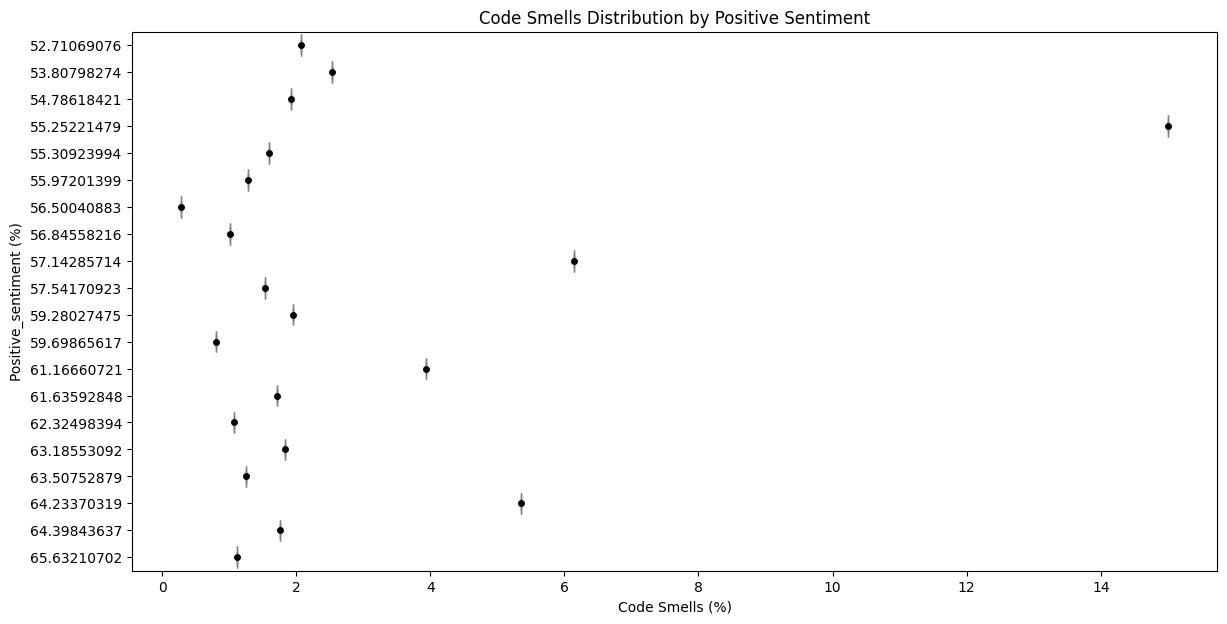

In [7]:
# Dynamic title for scatter plot
metric_used = 'positive_sentiment'  # Change this based on the metric used for top repos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_repos, x=metric_used, y='bug', hue='file_name', s=100)
plt.title(f'{metric_used.capitalize()} vs Bug')
plt.xlabel(f'{metric_used.capitalize()} (%)')
plt.ylabel('Bug (%)')
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Improved heatmap with mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sentiment and Code Quality Metrics')
plt.show()

# Enhanced box plot with swarmplot
plt.figure(figsize=(14, 7))
sns.boxplot(data=top_repos, x='code_smells', y=metric_used, orient='h', color='lightgray')
sns.swarmplot(data=top_repos, x='code_smells', y=metric_used, orient='h', color='black')
plt.title('Code Smells Distribution by Positive Sentiment')
plt.xlabel('Code Smells (%)')
plt.ylabel(f'{metric_used.capitalize()} (%)')
plt.show()

# Facet grid of heatmaps with dynamic titles
# ... rest of your code for facet grid of heatmaps ...


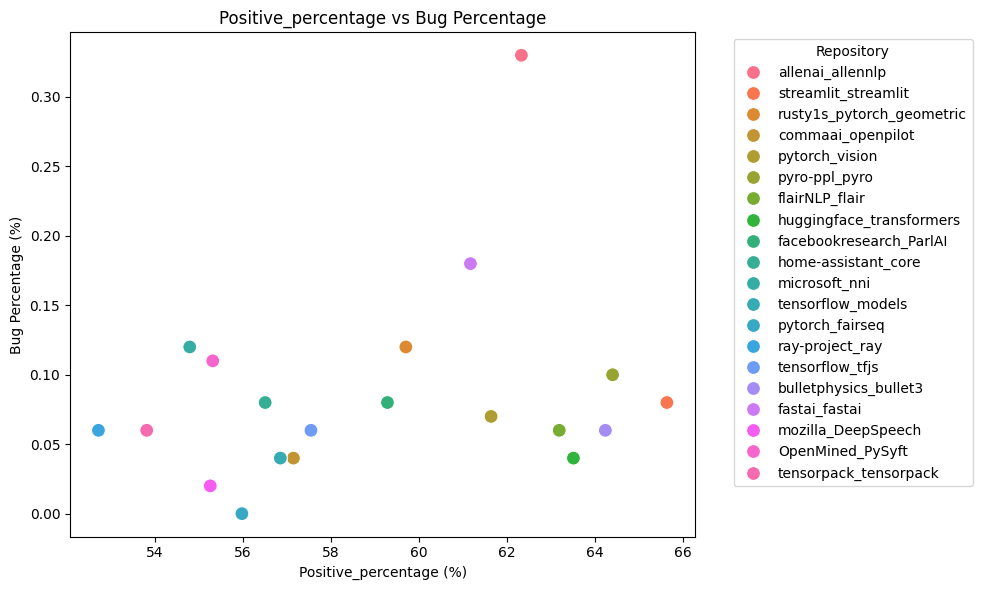

In [114]:
# Dynamic title for scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_repos, x='positive_sentiment', y='bug', hue='file_name', s=100)
plt.title(f'{metric_used.capitalize()} vs Bug)
plt.xlabel(f'{metric_used.capitalize()} (%)')
plt.ylabel('Bug (%)')
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

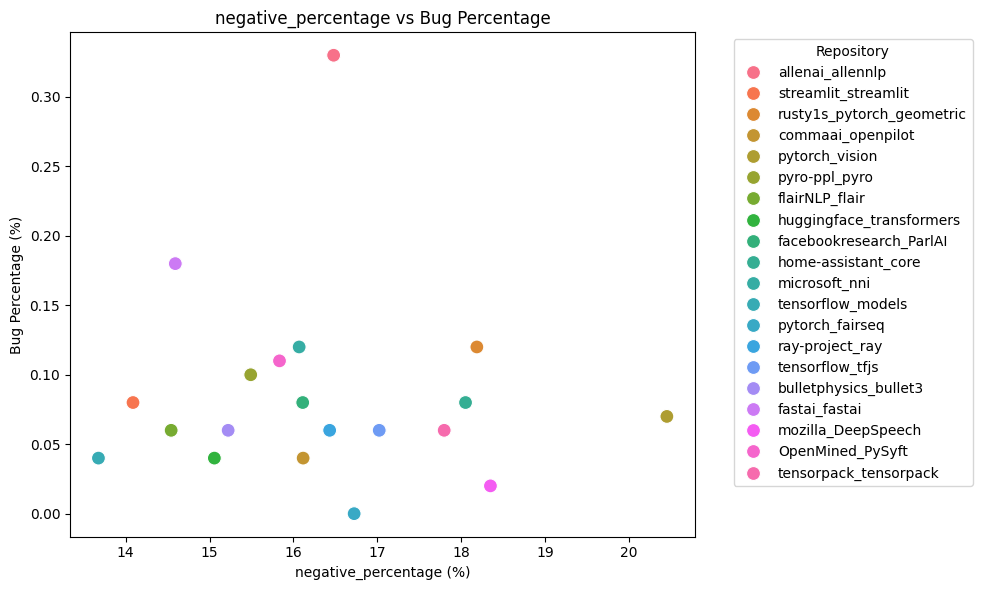

In [117]:
# Dynamic title for scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_repos, x='negative_sentiment', y='bug', hue='file_name', s=100)
plt.title(f'negative sentiment vs Bug')
plt.xlabel(f'negative sentiment (%)')
plt.ylabel('Bug (%)')
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\1572589803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['bug_positive_ratio'] = top_repos['bug'] / top_repos['positive_sentiment']
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\1572589803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['bug_negative_ratio'] = top_repos['bug'] / top_repos['negative_sentiment']
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\1572589803.py:4: SettingWithCopyWarning: 


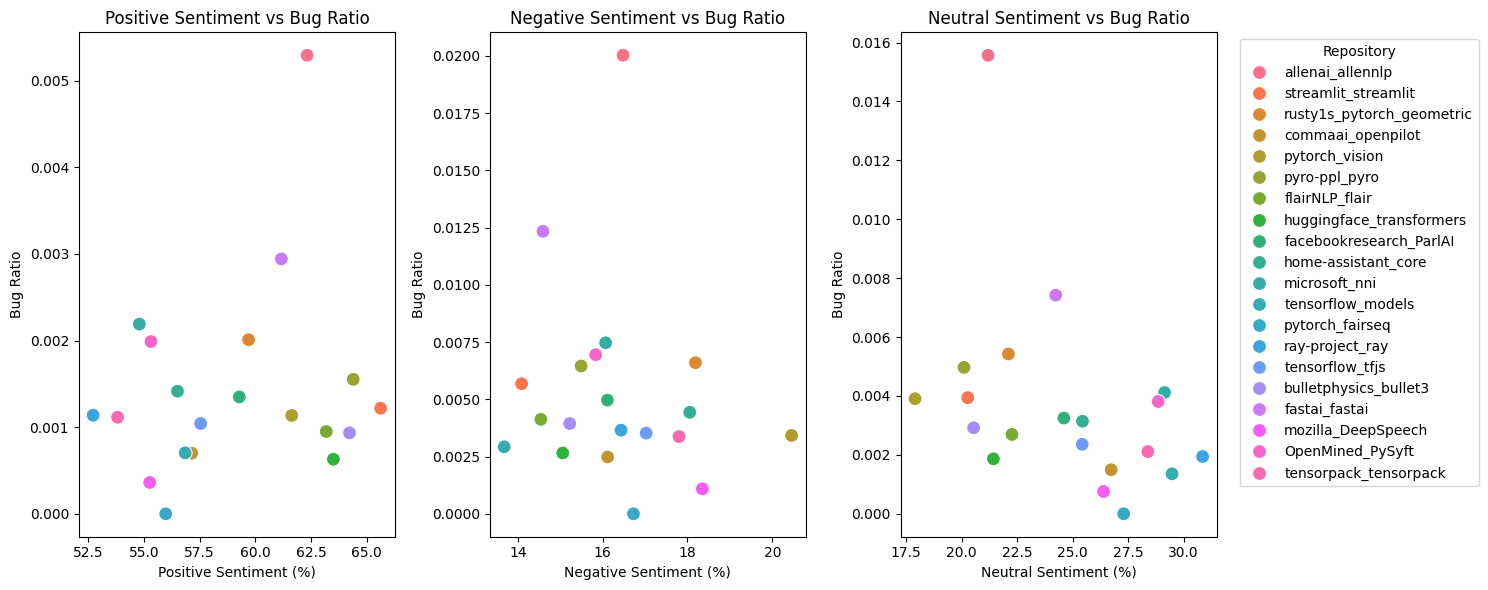

In [6]:
# Calculate the ratio of bug percentage to positive percentage, negative percentage, and neutral percentage
top_repos['bug_positive_ratio'] = top_repos['bug'] / top_repos['positive_sentiment']
top_repos['bug_negative_ratio'] = top_repos['bug'] / top_repos['negative_sentiment']
top_repos['bug_neutral_ratio'] = top_repos['bug'] / top_repos['neutral_sentiment']

# Dynamic title for scatter plot with bug ratio
plt.figure(figsize=(15, 6))

# Scatter plot for bug percentage vs positive percentage ratio
plt.subplot(1, 3, 1)
sns.scatterplot(data=top_repos, x='positive_sentiment', y='bug_positive_ratio', hue='file_name', s=100, legend=None)
plt.title('Positive Sentiment vs Bug Ratio')
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Bug Ratio')

# Scatter plot for bug percentage vs negative percentage ratio
plt.subplot(1, 3, 2)
sns.scatterplot(data=top_repos, x='negative_sentiment', y='bug_negative_ratio', hue='file_name', s=100, legend=None)
plt.title('Negative Sentiment vs Bug Ratio')
plt.xlabel('Negative Sentiment (%)')
plt.ylabel('Bug Ratio')

# Scatter plot for bug percentage vs neutral percentage ratio
plt.subplot(1, 3, 3)
sns.scatterplot(data=top_repos, x='neutral_sentiment', y='bug_neutral_ratio', hue='file_name', s=100)
plt.title('Neutral Sentiment vs Bug Ratio')
plt.xlabel('Neutral Sentiment (%)')
plt.ylabel('Bug Ratio')

# Create a single legend outside the subplots
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.savefig(f'{path_to_diagrms_folder}/bug_ratio_scatter_plot.png', dpi=500)

plt.show()


C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_19792\2475534101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['duplicate_positive_ratio'] = top_repos['duplication'] / top_repos['positive_sentiment']
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_19792\2475534101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['duplicate_negative_ratio'] = top_repos['duplication'] / top_repos['negative_sentiment']
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_19792\2475534101.py:

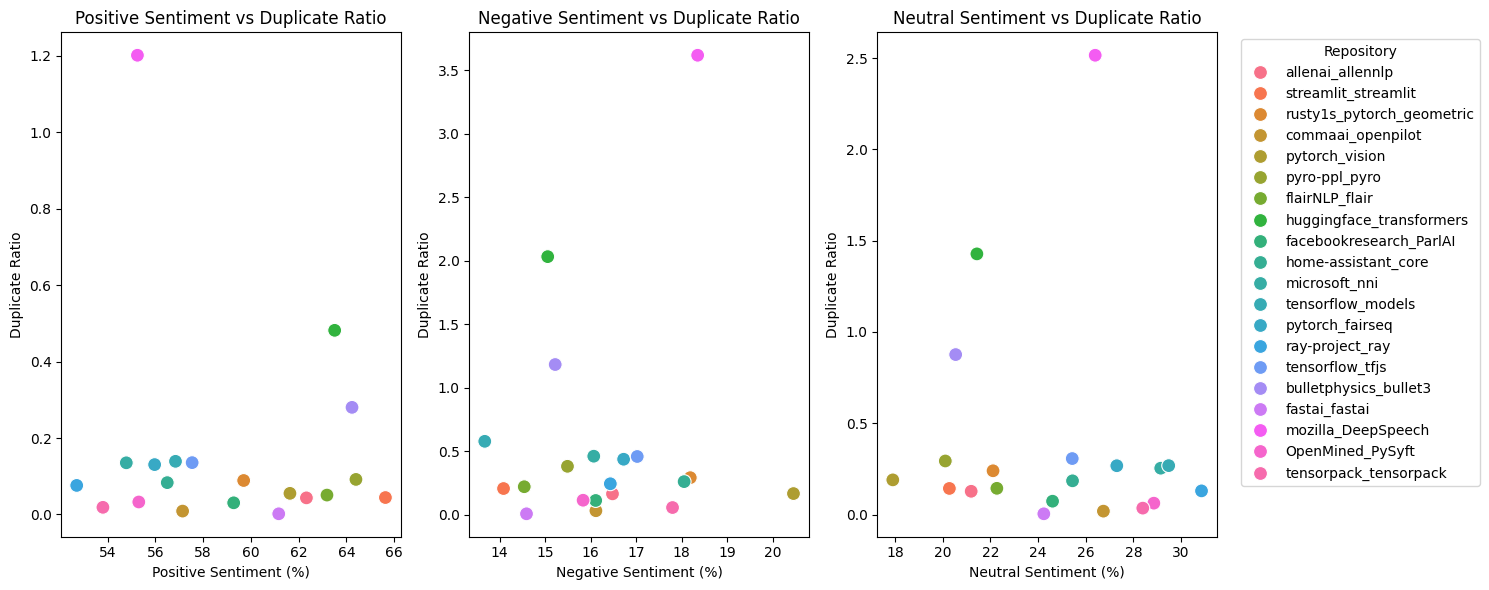

In [68]:
# Calculate the ratio of bug percentage to positive percentage, negative percentage, and neutral percentage
top_repos['duplicate_positive_ratio'] = top_repos['duplication'] / top_repos['positive_sentiment']
top_repos['duplicate_negative_ratio'] = top_repos['duplication'] / top_repos['negative_sentiment']
top_repos['duplicate_neutral_ratio'] = top_repos['duplication'] / top_repos['neutral_sentiment']

# Dynamic title for scatter plot with bug ratio
plt.figure(figsize=(15, 6))

# Scatter plot for bug percentage vs positive percentage ratio
plt.subplot(1, 3, 1)
sns.scatterplot(data=top_repos, x='positive_sentiment', y='duplicate_positive_ratio', hue='file_name', s=100, legend=None)
plt.title('Positive Sentiment vs Duplicate Ratio')
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Duplicate Ratio')

# Scatter plot for bug percentage vs negative percentage ratio
plt.subplot(1, 3, 2)
sns.scatterplot(data=top_repos, x='negative_sentiment', y='duplicate_negative_ratio', hue='file_name', s=100, legend=None)
plt.title('Negative Sentiment vs Duplicate Ratio')
plt.xlabel('Negative Sentiment (%)')
plt.ylabel('Duplicate Ratio')

# Scatter plot for bug percentage vs neutral percentage ratio
plt.subplot(1, 3, 3)
sns.scatterplot(data=top_repos, x='neutral_sentiment', y='duplicate_neutral_ratio', hue='file_name', s=100)
plt.title('Neutral Sentiment vs Duplicate Ratio')
plt.xlabel('Neutral Sentiment (%)')
plt.ylabel('Duplicate Ratio')

# Create a single legend outside the subplots
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/duplicate_ratio_scatter_plot.png', dpi=500)
plt.show()


C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\3096953106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['security_hotspot_positive_ratio'] = top_repos['security_hotspots'] / top_repos['positive_sentiment']
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\3096953106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['security_hotspot_negative_ratio'] = top_repos['security_hotspots'] / top_repos['negative_sentiment']
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipyk

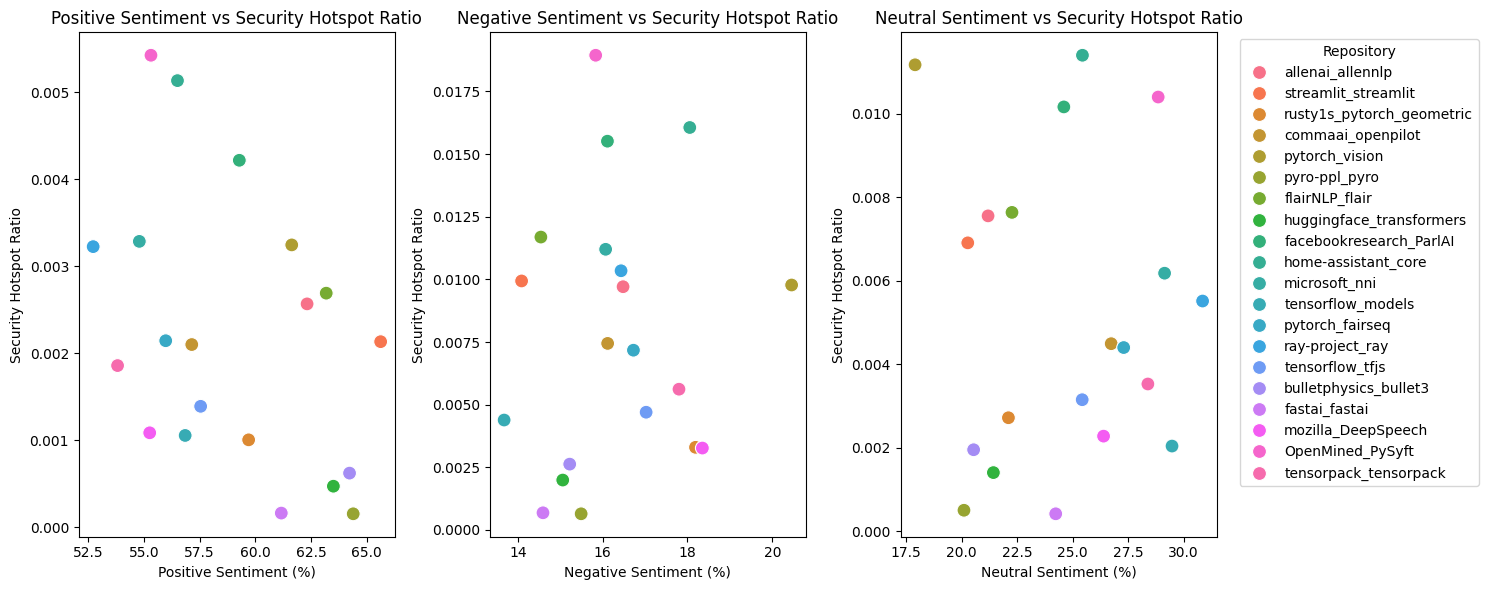

In [7]:
# Calculate the ratio of bug percentage to positive percentage, negative percentage, and neutral percentage
top_repos['security_hotspot_positive_ratio'] = top_repos['security_hotspots'] / top_repos['positive_sentiment']
top_repos['security_hotspot_negative_ratio'] = top_repos['security_hotspots'] / top_repos['negative_sentiment']
top_repos['security_hotspot_neutral_ratio'] = top_repos['security_hotspots'] / top_repos['neutral_sentiment']

# Dynamic title for scatter plot with bug ratio
plt.figure(figsize=(15, 6))

# Scatter plot for bug percentage vs positive percentage ratio
plt.subplot(1, 3, 1)
sns.scatterplot(data=top_repos, x='positive_sentiment', y='security_hotspot_positive_ratio', hue='file_name', s=100, legend=None)
plt.title('Positive Sentiment vs Security Hotspot Ratio')
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Security Hotspot Ratio')

# Scatter plot for bug percentage vs negative percentage ratio
plt.subplot(1, 3, 2)
sns.scatterplot(data=top_repos, x='negative_sentiment', y='security_hotspot_negative_ratio', hue='file_name', s=100, legend=None)
plt.title('Negative Sentiment vs Security Hotspot Ratio')
plt.xlabel('Negative Sentiment (%)')
plt.ylabel('Security Hotspot Ratio')

# Scatter plot for bug percentage vs neutral percentage ratio
plt.subplot(1, 3, 3)
sns.scatterplot(data=top_repos, x='neutral_sentiment', y='security_hotspot_neutral_ratio', hue='file_name', s=100)
plt.title('Neutral Sentiment vs Security Hotspot Ratio')
plt.xlabel('Neutral Sentiment (%)')
plt.ylabel('Security Hotspot Ratio')

# Create a single legend outside the subplots
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/security_hotspot_ratio_scatter_plot.png', dpi=500)
plt.show()


C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\1972389962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['code_smells_positive_ratio'] = top_repos['code_smells'] / top_repos['positive_sentiment']
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\1972389962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['code_smells_negative_ratio'] = top_repos['code_smells'] / top_repos['negative_sentiment']
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\1972389962

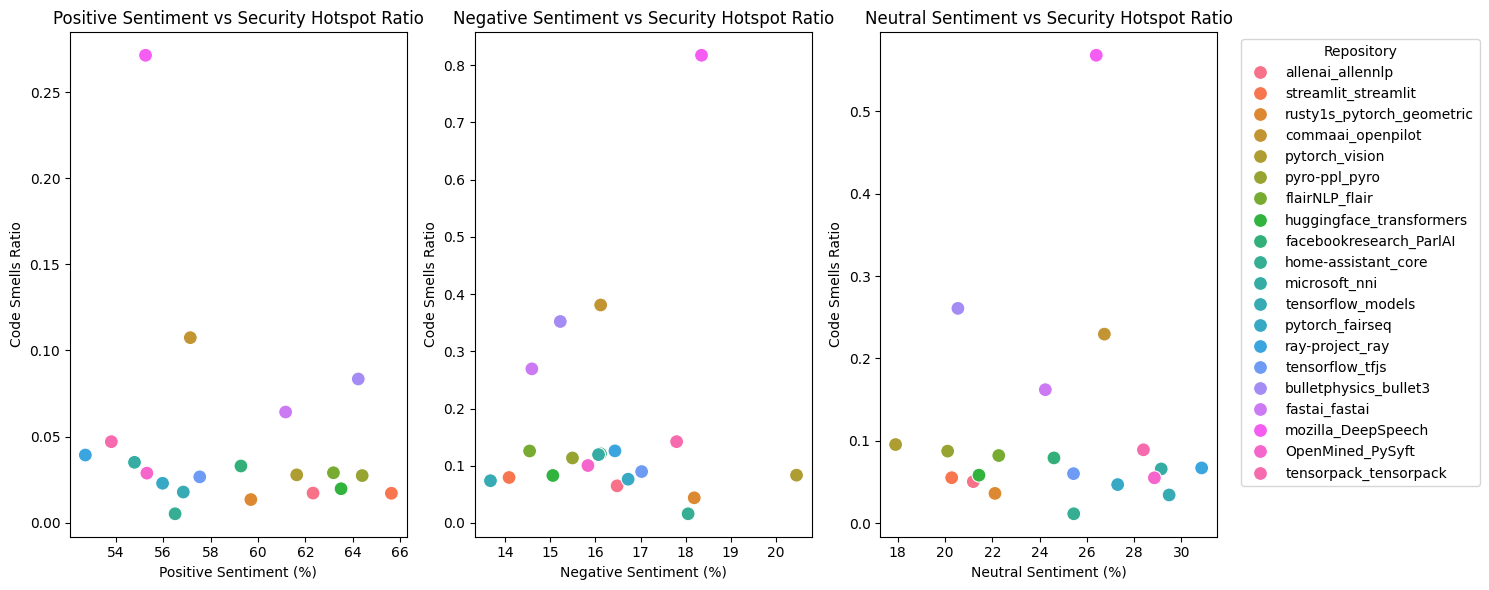

In [8]:
# Calculate the ratio of bug percentage to positive percentage, negative percentage, and neutral percentage
top_repos['code_smells_positive_ratio'] = top_repos['code_smells'] / top_repos['positive_sentiment']
top_repos['code_smells_negative_ratio'] = top_repos['code_smells'] / top_repos['negative_sentiment']
top_repos['code_smells_neutral_ratio'] = top_repos['code_smells'] / top_repos['neutral_sentiment']

# Dynamic title for scatter plot with bug ratio
plt.figure(figsize=(15, 6))

# Scatter plot for bug percentage vs positive percentage ratio
plt.subplot(1, 3, 1)
sns.scatterplot(data=top_repos, x='positive_sentiment', y='code_smells_positive_ratio', hue='file_name', s=100, legend=None)
plt.title('Positive Sentiment vs Security Hotspot Ratio')
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Code Smells Ratio')

# Scatter plot for bug percentage vs negative percentage ratio
plt.subplot(1, 3, 2)
sns.scatterplot(data=top_repos, x='negative_sentiment', y='code_smells_negative_ratio', hue='file_name', s=100, legend=None)
plt.title('Negative Sentiment vs Security Hotspot Ratio')
plt.xlabel('Negative Sentiment (%)')
plt.ylabel('Code Smells Ratio')

# Scatter plot for bug percentage vs neutral percentage ratio
plt.subplot(1, 3, 3)
sns.scatterplot(data=top_repos, x='neutral_sentiment', y='code_smells_neutral_ratio', hue='file_name', s=100)
plt.title('Neutral Sentiment vs Security Hotspot Ratio')
plt.xlabel('Neutral Sentiment (%)')
plt.ylabel('Code Smells Ratio')

# Create a single legend outside the subplots
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/code_smells_ratio_scatter_plot.png', dpi=500)
plt.show()


C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:13: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])


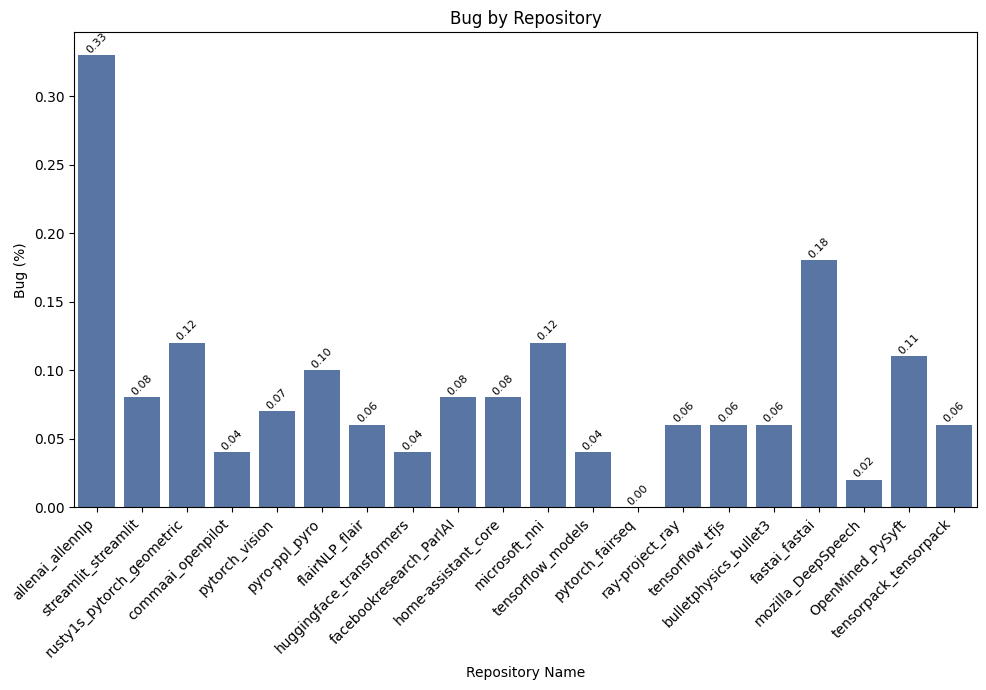

C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:13: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])


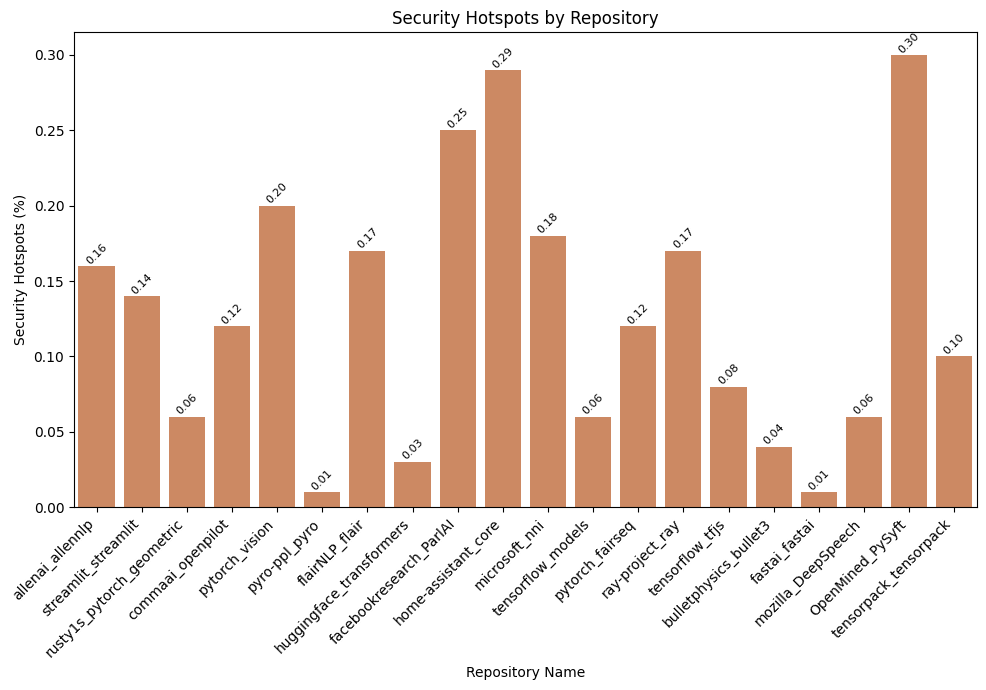

C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:13: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])


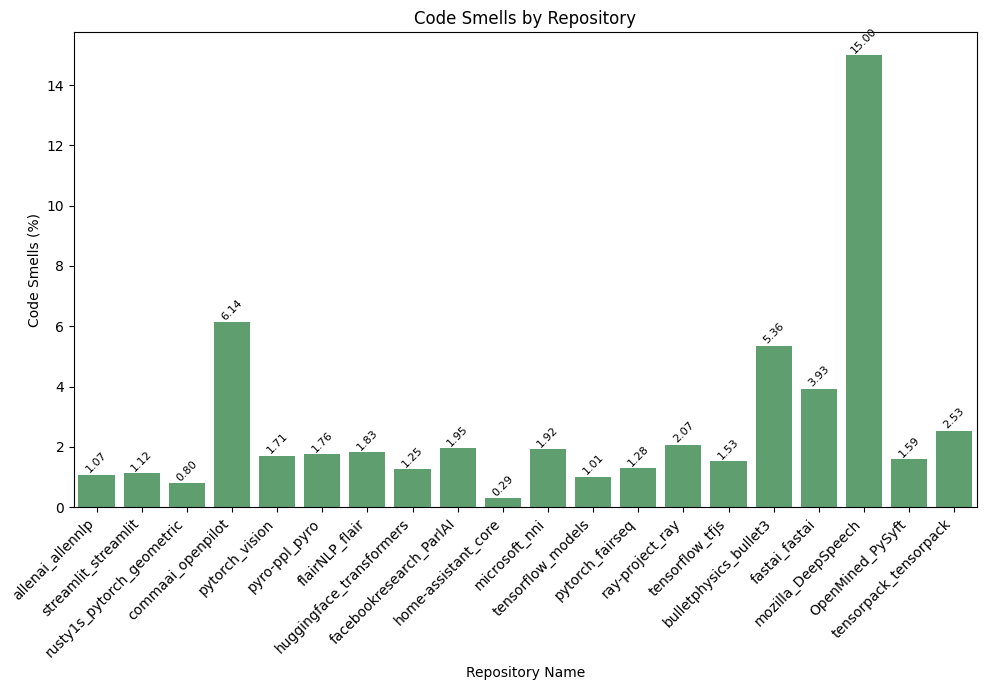

C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:13: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])


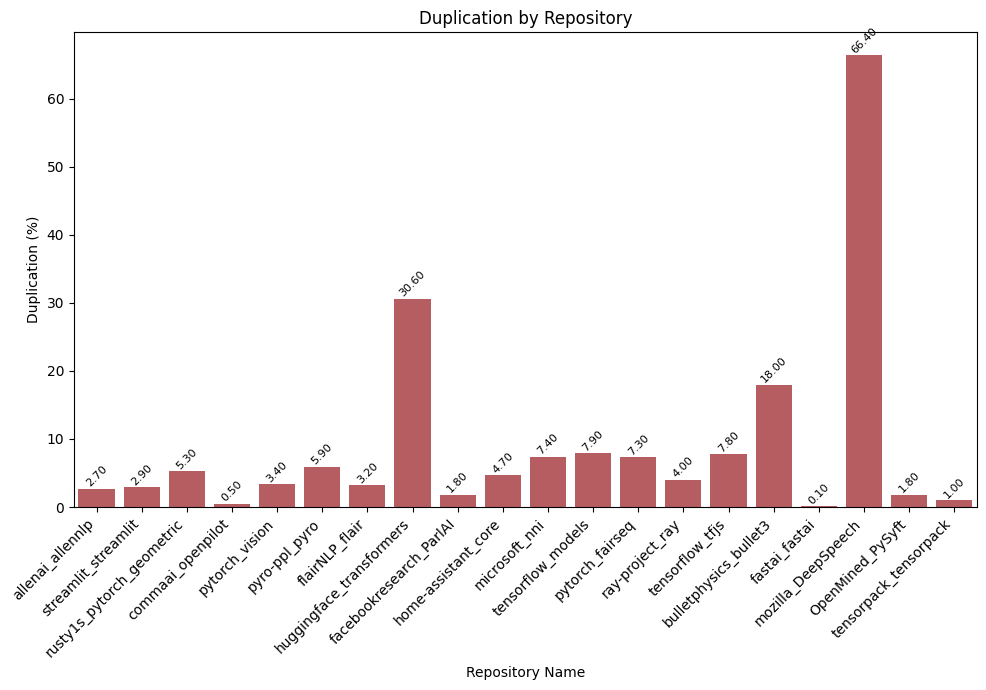

C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:30: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])


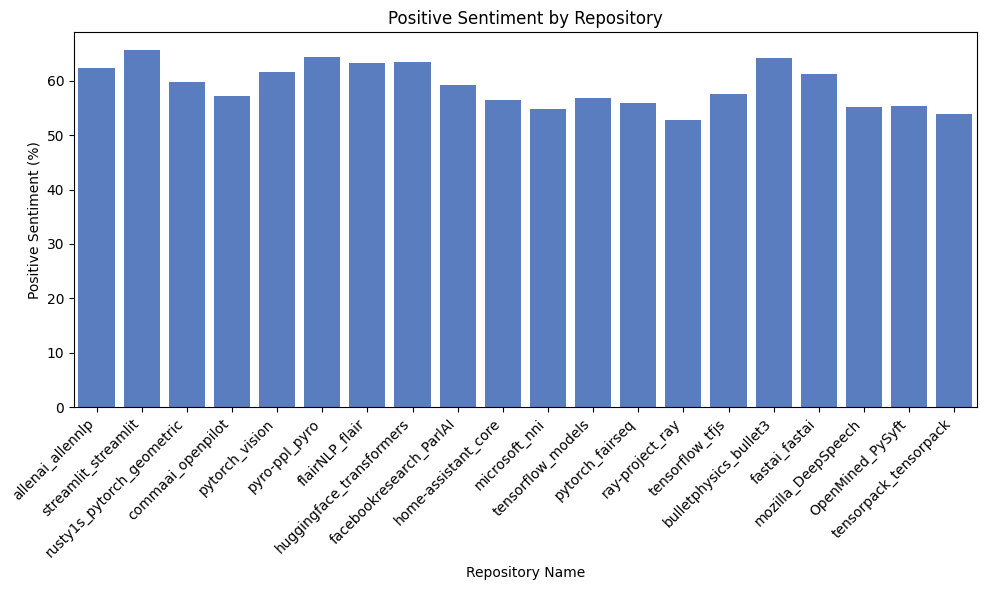

C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:30: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])


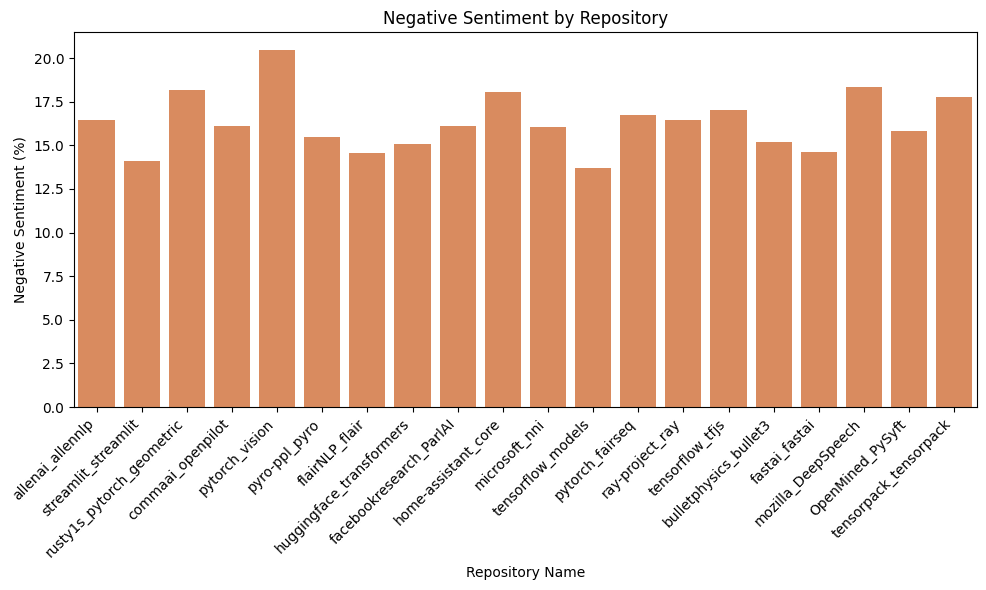

C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])
C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\2320035214.py:30: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])


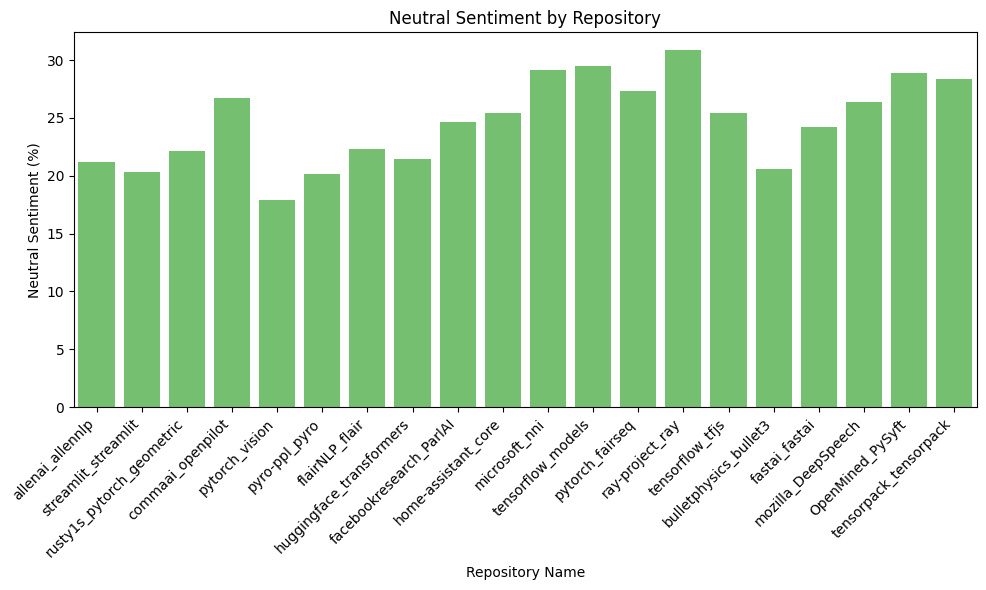

In [9]:
import seaborn as sns

# Plotting sentiment metrics for each repository
sentiment_metrics = ['positive_sentiment', 'negative_sentiment', 'neutral_sentiment']

# Define custom color palettes for quality metrics and sentiment metrics
quality_palette = sns.color_palette("deep", len(quality_metrics))
sentiment_palette = sns.color_palette("muted", len(sentiment_metrics))

# Plotting quality metrics for each repository with custom palette
for metric, color in zip(quality_metrics, quality_palette):
    plt.figure(figsize=(10, 7))
    sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])
    plt.title(f'{metric.replace("_", " ").title()} by Repository')
    plt.xlabel('Repository Name')
    plt.ylabel(f'{metric.replace("_", " ").title()} (%)')
    plt.xticks(rotation=45, ha='right')

    # Add percentage values on top of each bar
    for index, value in enumerate(top_repos[metric]):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', rotation=45, fontsize=8)

    plt.tight_layout()
    plt.savefig(f'{path_to_diagrms_folder}/{metric}_by_repository.png', dpi=500)  # Save the plot with a suitable name
    plt.show()

# Plotting sentiment metrics for each repository with custom palette
for metric, color in zip(sentiment_metrics, sentiment_palette):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_repos, x='file_name', y=metric, palette=[color])
    plt.title(f'{metric.replace("_", " ").title()} by Repository')
    plt.xlabel('Repository Name')
    plt.ylabel(f'{metric.replace("_", " ").title()} (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{path_to_diagrms_folder}/{metric}_by_repository.png', dpi=500)  # Save the plot with a suitable name
    plt.show()


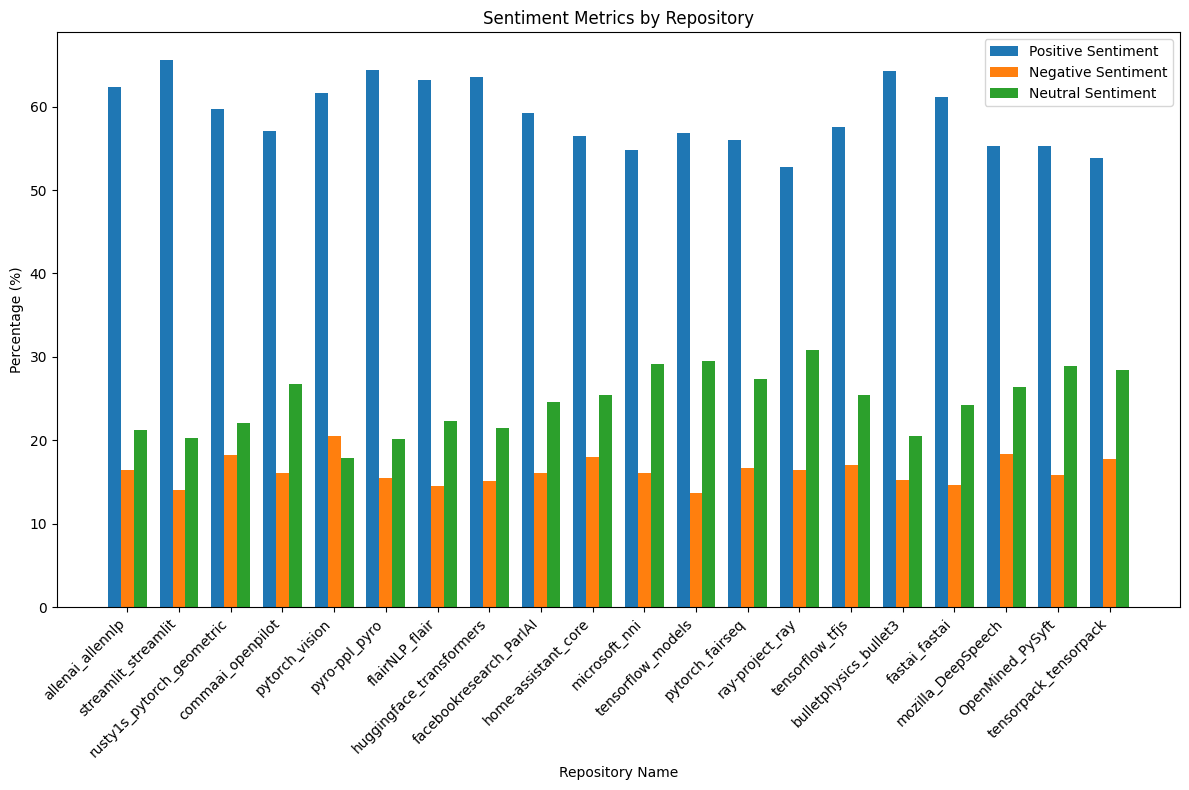

In [10]:

plt.figure(figsize=(12, 8))
# Iterate over sentiment metrics and plot grouped bar chart
for index, metric in enumerate(sentiment_metrics):
    positions = np.arange(len(top_repos)) + index * 0.25 - 0.25 * (len(sentiment_metrics) - 1) / 2
    plt.bar(positions, top_repos[metric], width=0.25, label=metric.replace("_", " ").title())

# Customize the plot
plt.title('Sentiment Metrics by Repository')
plt.xlabel('Repository Name')
plt.ylabel('Percentage (%)')
plt.xticks(np.arange(len(top_repos)), top_repos['file_name'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/sentiment_metrics_by_repository.png', dpi=500)  # Save the plot with a suitable name
plt.show()

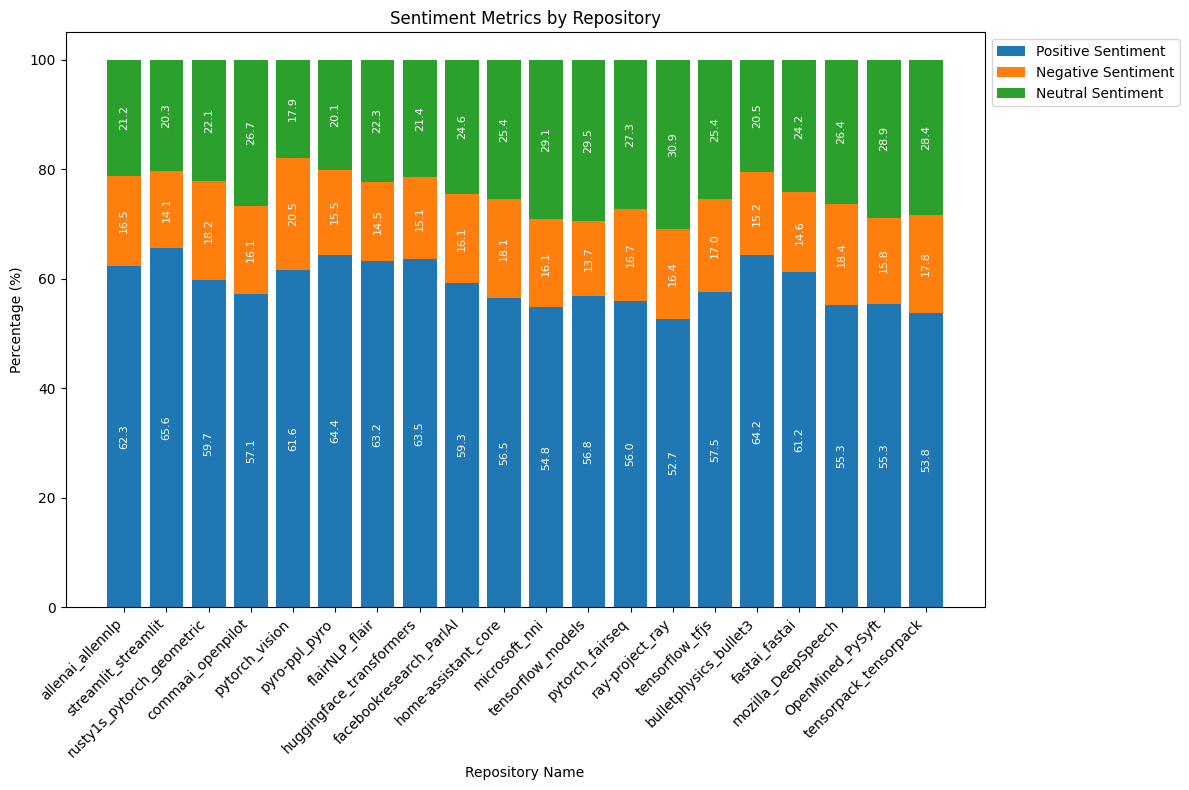

In [11]:
# Plotting sentiment metrics for each repository
plt.figure(figsize=(12, 8))

# Iterate over sentiment metrics and plot stacked grouped bar chart
bottom = np.zeros(len(top_repos))
for metric in sentiment_metrics:
    bars = plt.bar(top_repos['file_name'], top_repos[metric], label=metric.replace("_", " ").title(), bottom=bottom)
    bottom += top_repos[metric]

    # Annotate each stack with its corresponding value
    for bar, value in zip(bars, df[metric]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', 
                 ha='center', va='center', color='white', fontsize=8, rotation=90)

# Customize the plot
plt.title('Sentiment Metrics by Repository')
plt.xlabel('Repository Name')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/sentiment_metrics_by_repository_stacked.png', dpi=500)  # Save the plot with a suitable name
plt.show()

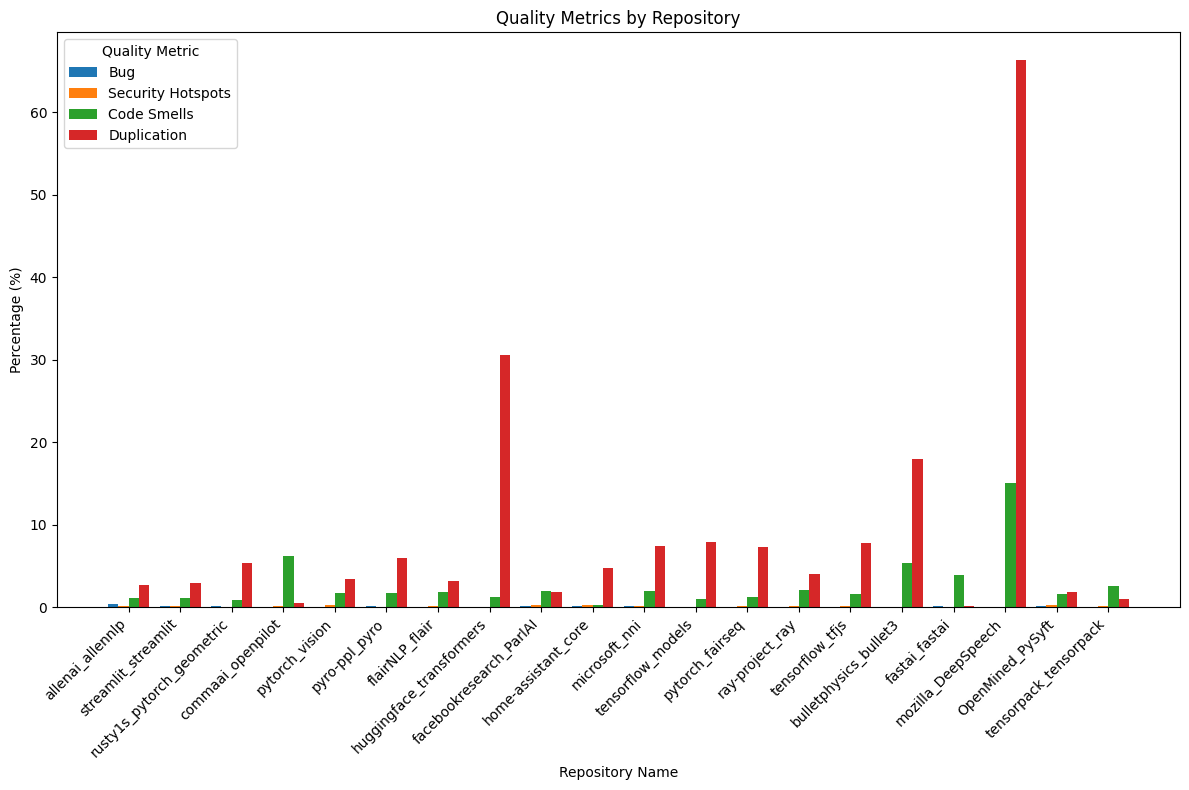

In [12]:
# Plotting grouped bar chart for quality metrics
plt.figure(figsize=(12, 8))

# Set the width of each bar
bar_width = 0.2

# Calculate the position of each bar
positions = np.arange(len(top_repos))

# Plot each quality metric as a grouped bar
for idx, metric in enumerate(quality_metrics):
    plt.bar(positions + idx * bar_width, top_repos[metric], width=bar_width, label=metric.replace("_", " ").title())

# Customize the plot
plt.title('Quality Metrics by Repository')
plt.xlabel('Repository Name')
plt.ylabel('Percentage (%)')
plt.xticks(positions + (len(quality_metrics) - 1) * bar_width / 2, top_repos['file_name'], rotation=45, ha='right')
plt.legend(title='Quality Metric')
plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/quality_metrics_by_repository_grouped.png', dpi=500)  # Save the plot with a suitable name
plt.show()


C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\1656275227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['total_percentage'] = top_repos[quality_metrics].sum(axis=1)


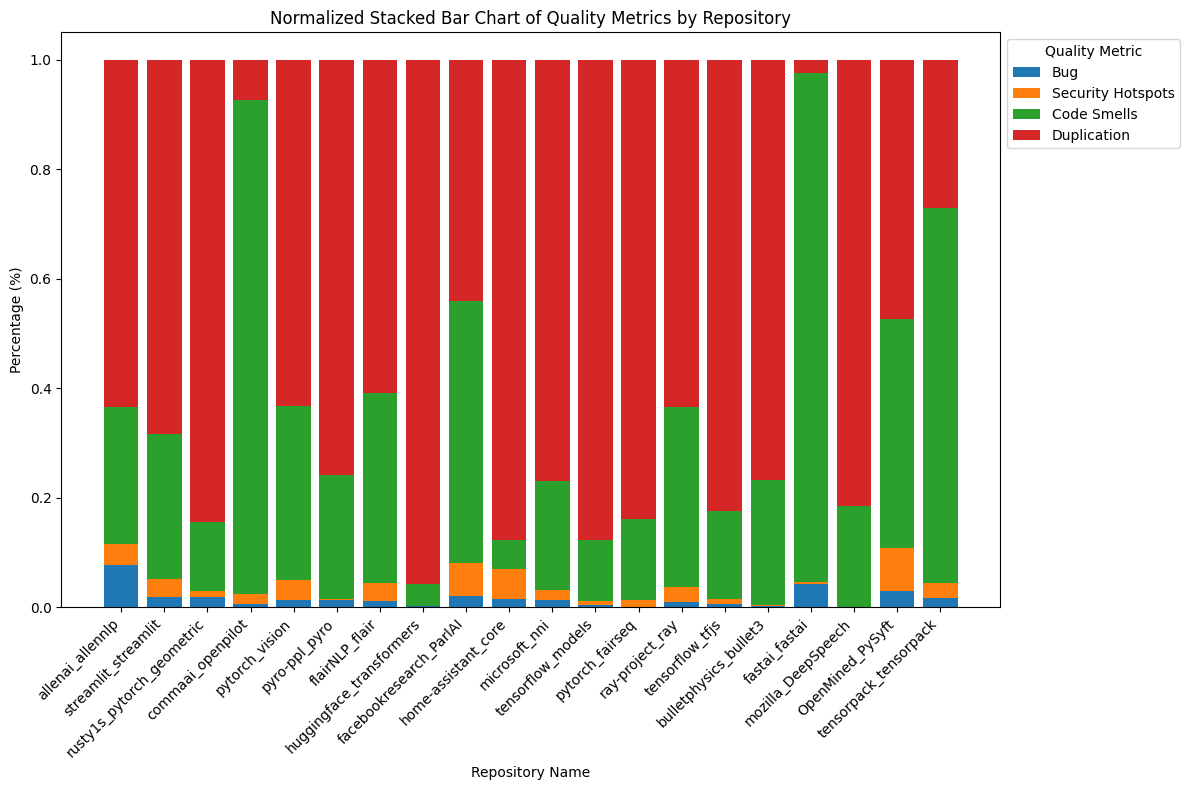

In [13]:
# Calculate the total percentage for each repository
top_repos['total_percentage'] = top_repos[quality_metrics].sum(axis=1)

# Normalize the quality metrics by dividing by the total percentage
normalized_df = top_repos[quality_metrics].div(top_repos['total_percentage'], axis=0)

# Plotting normalized stacked bar chart for quality metrics
plt.figure(figsize=(12, 8))

# Plot each quality metric as a stacked bar
bottom = np.zeros(len(top_repos))
for metric in quality_metrics:
    plt.bar(top_repos['file_name'], normalized_df[metric], bottom=bottom, label=metric.replace("_", " ").title())
    bottom += normalized_df[metric]

# Customize the plot
plt.title('Normalized Stacked Bar Chart of Quality Metrics by Repository')
plt.xlabel('Repository Name')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quality Metric', loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/normalized_quality_metrics_by_repository_stacked.png', dpi=500)  # Save the plot with a suitable name
plt.show()


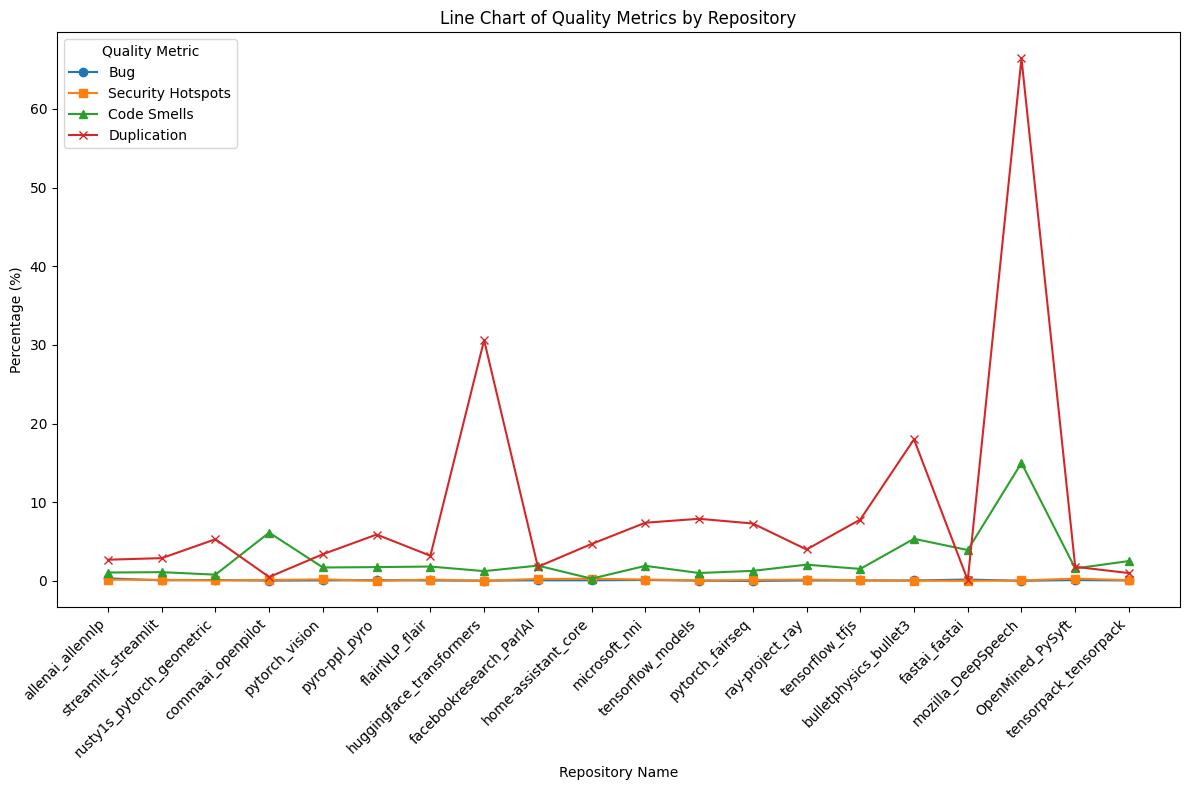

In [14]:
# Define markers for each quality metric
markers = ['o', 's', '^', 'x']  # You can add more markers if needed

# Plotting line chart for quality metrics
plt.figure(figsize=(12, 8))

# Plot each quality metric as a line chart with different markers
for i, metric in enumerate(quality_metrics):
    plt.plot(top_repos['file_name'], top_repos[metric], marker=markers[i], label=metric.replace("_", " ").title())

# Customize the plot
plt.title('Line Chart of Quality Metrics by Repository')
plt.xlabel('Repository Name')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quality Metric')
plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/quality_metrics_by_repository_line_chart.png', dpi=500)  # Save the plot with a suitable name
plt.show()


<Figure size 1200x800 with 0 Axes>

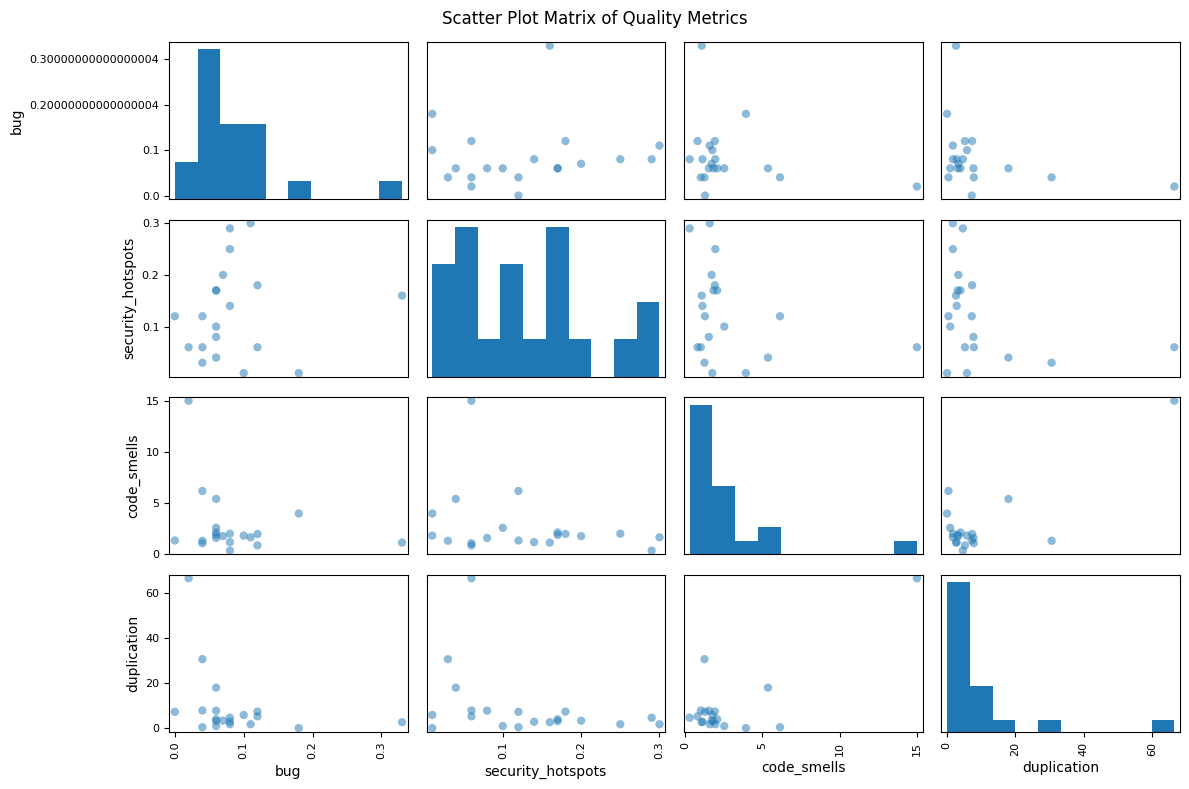

In [15]:
# Plotting scatter plot matrix for quality metrics
plt.figure(figsize=(12, 8))

# Create a scatter plot matrix
scatter_matrix = pd.plotting.scatter_matrix(top_repos[quality_metrics], figsize=(12, 8), marker='o', diagonal='hist')

# Customize the scatter plot matrix
plt.suptitle('Scatter Plot Matrix of Quality Metrics')  # Adjust title position
plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

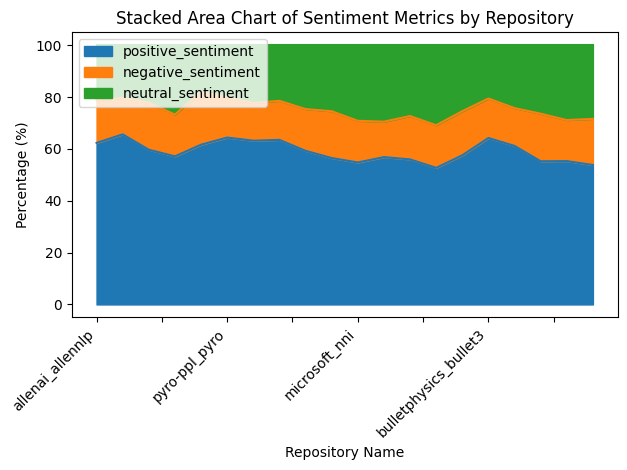

In [16]:
# Stacked Area Chart
plt.figure(figsize=(16, 8))
top_repos.set_index('file_name')[sentiment_metrics].plot(kind='area', stacked=True)
plt.title('Stacked Area Chart of Sentiment Metrics by Repository')
plt.xlabel('Repository Name')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



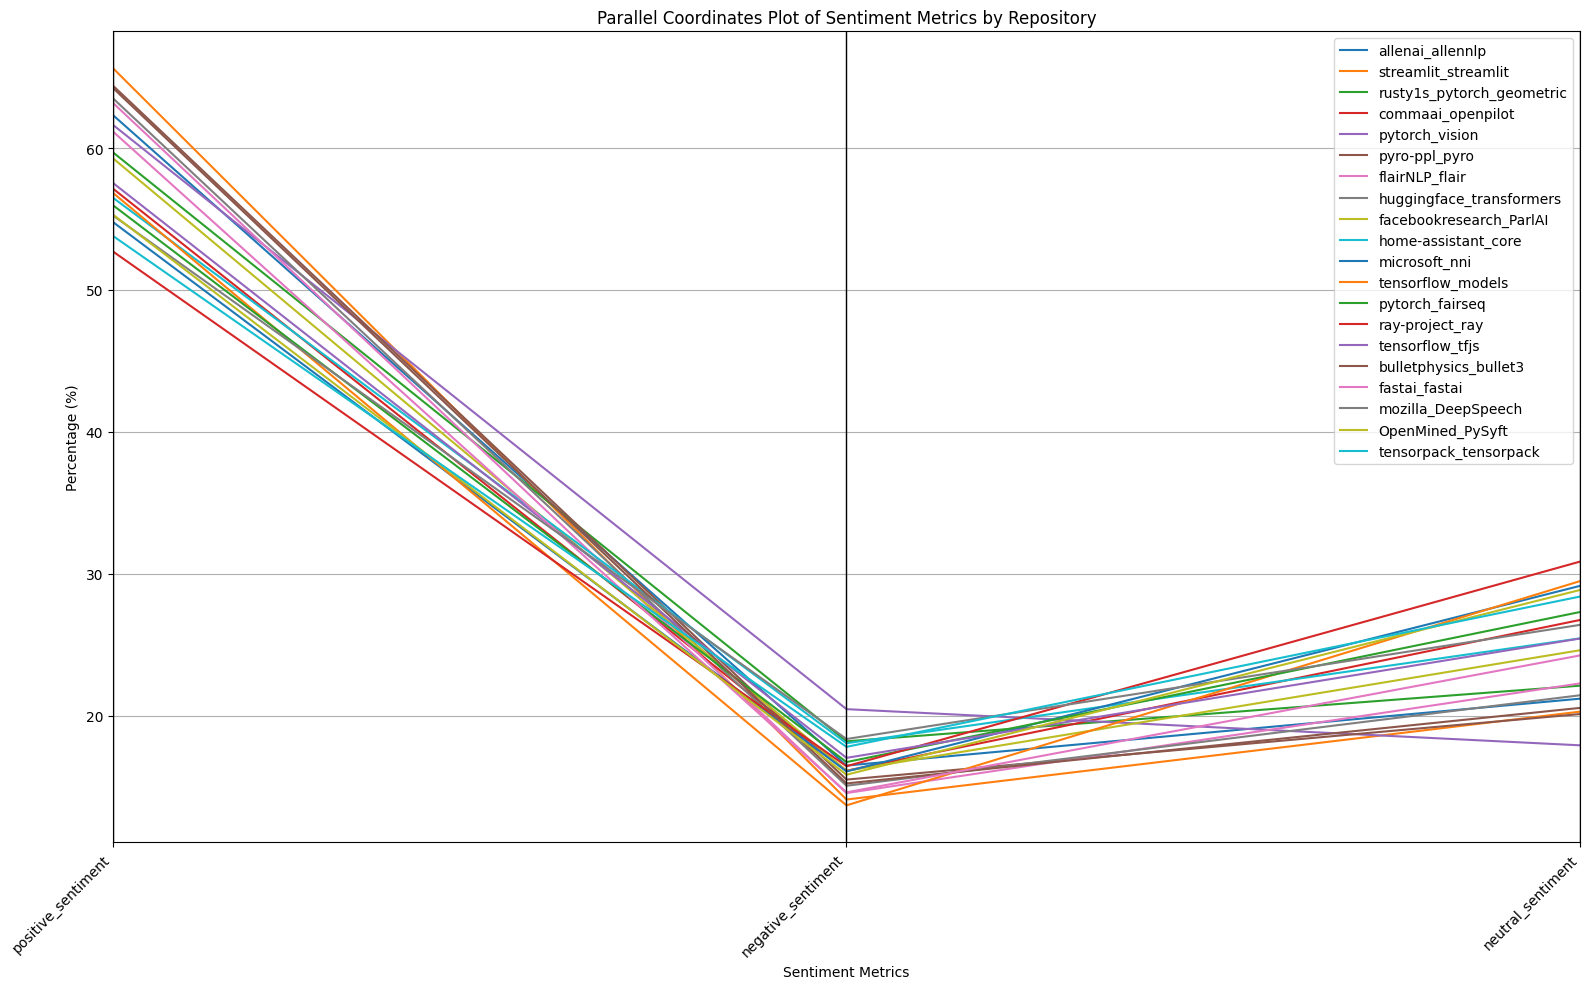

In [17]:

# Parallel Coordinates Plot
plt.figure(figsize=(16, 10))
pd.plotting.parallel_coordinates(top_repos, class_column='file_name', cols=sentiment_metrics, color=plt.cm.tab10.colors)
plt.title('Parallel Coordinates Plot of Sentiment Metrics by Repository')
plt.xlabel('Sentiment Metrics')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/parallel_coordinates_plot.png', dpi=500)  # Save the plot with a suitable name
plt.show()

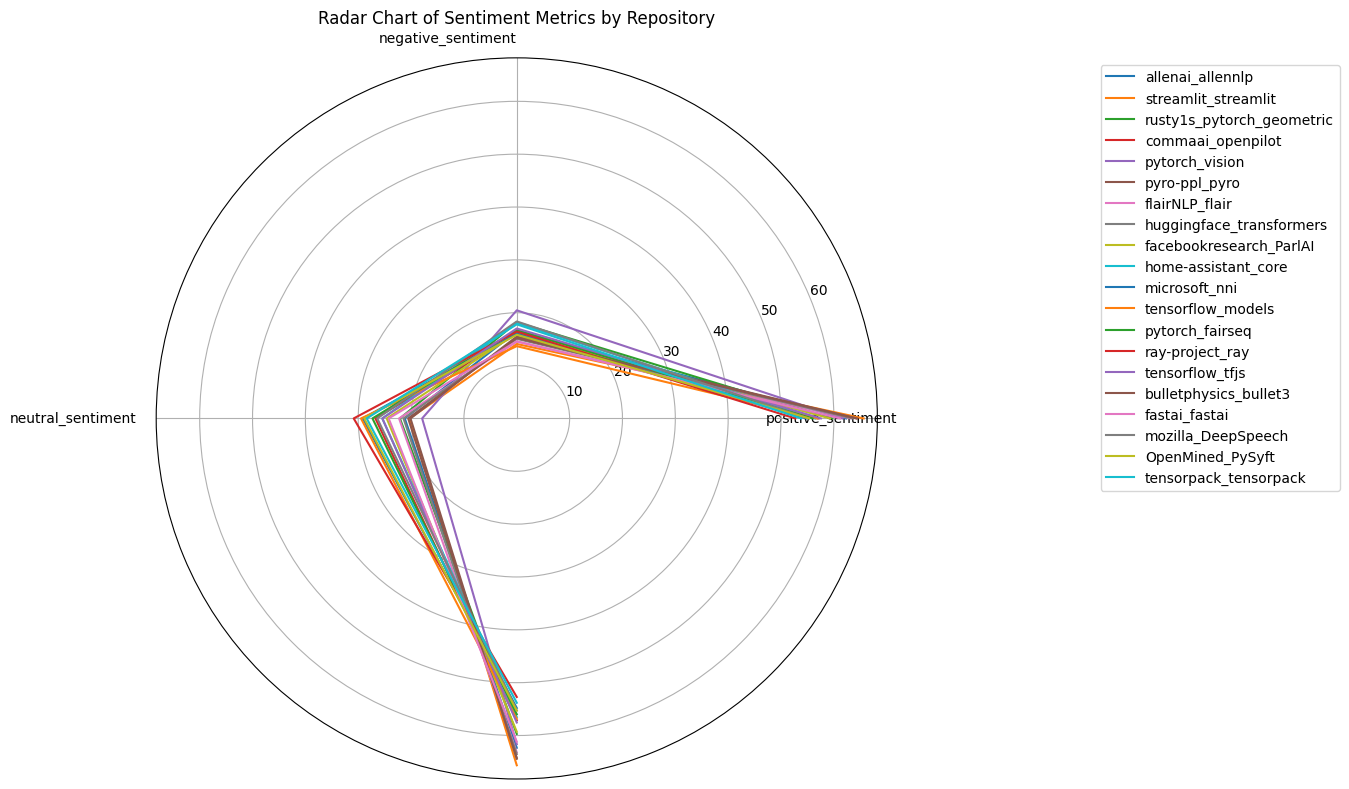

In [18]:
# Radar Chart
plt.figure(figsize=(12, 8))
angles = np.linspace(0, 2 * np.pi, len(sentiment_metrics) + 1, endpoint=False).tolist()  # Add 1 to the length
ax = plt.subplot(111, polar=True)
for idx, row in top_repos.iterrows():
    values = row[sentiment_metrics].tolist()
    values.append(values[0])  # Append the first value to close the polygon
    ax.plot(angles, values, label=row['file_name'])
plt.title('Radar Chart of Sentiment Metrics by Repository')
plt.legend(loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(angles[:-1], sentiment_metrics, ha='right')
plt.tight_layout()
plt.show()


C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\4196464493.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos[f'{metric}_cluster'] = kmeans.labels_


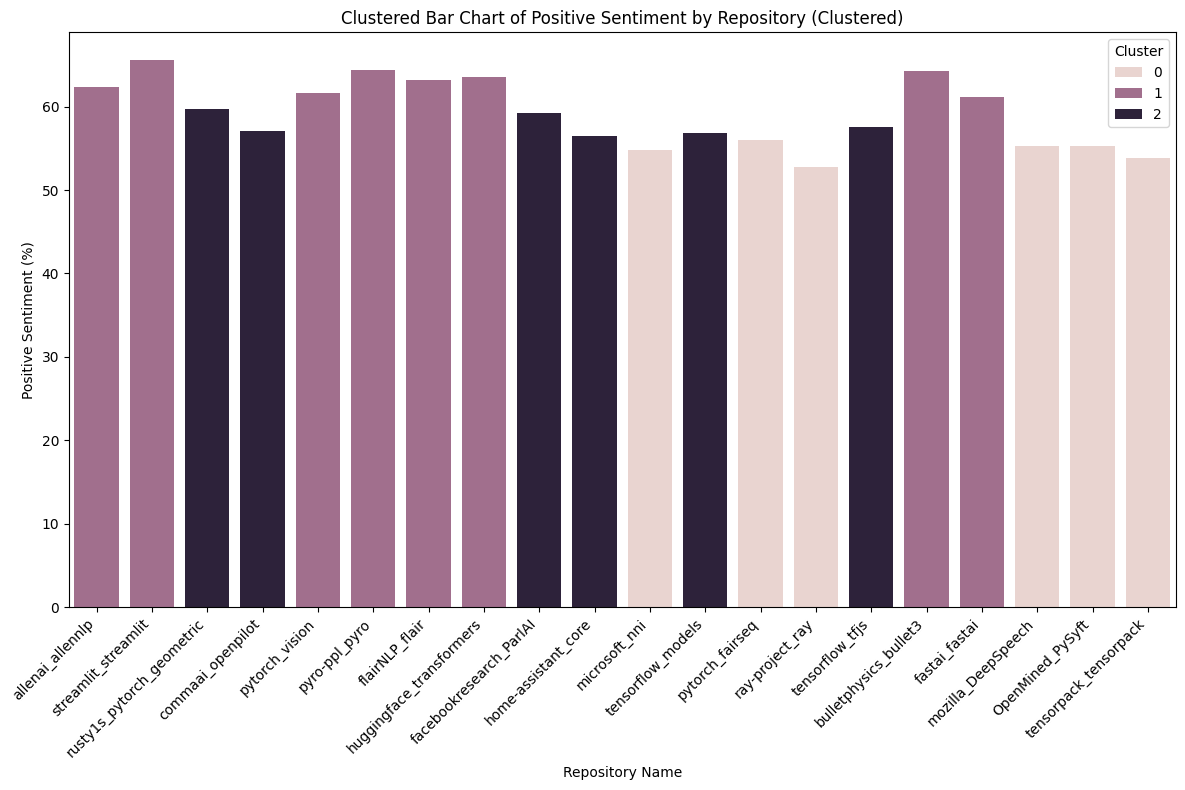

C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\4196464493.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos[f'{metric}_cluster'] = kmeans.labels_


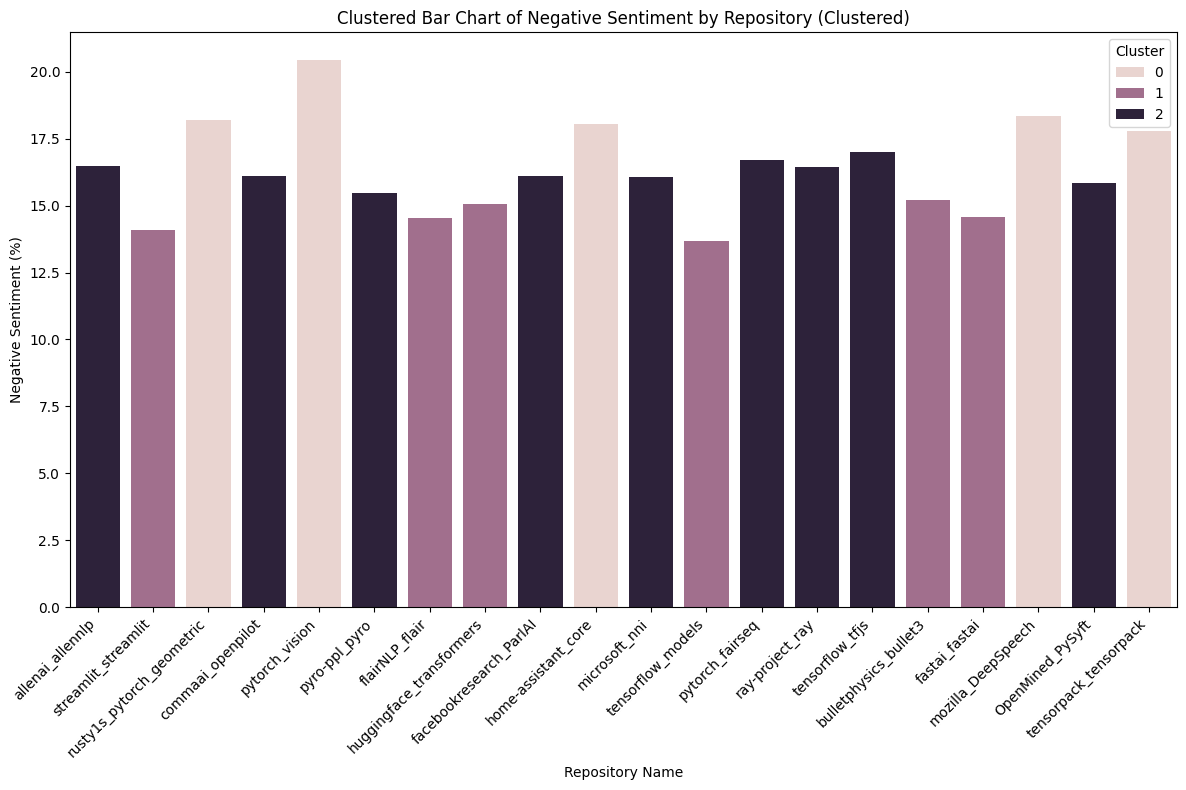

C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\4196464493.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos[f'{metric}_cluster'] = kmeans.labels_


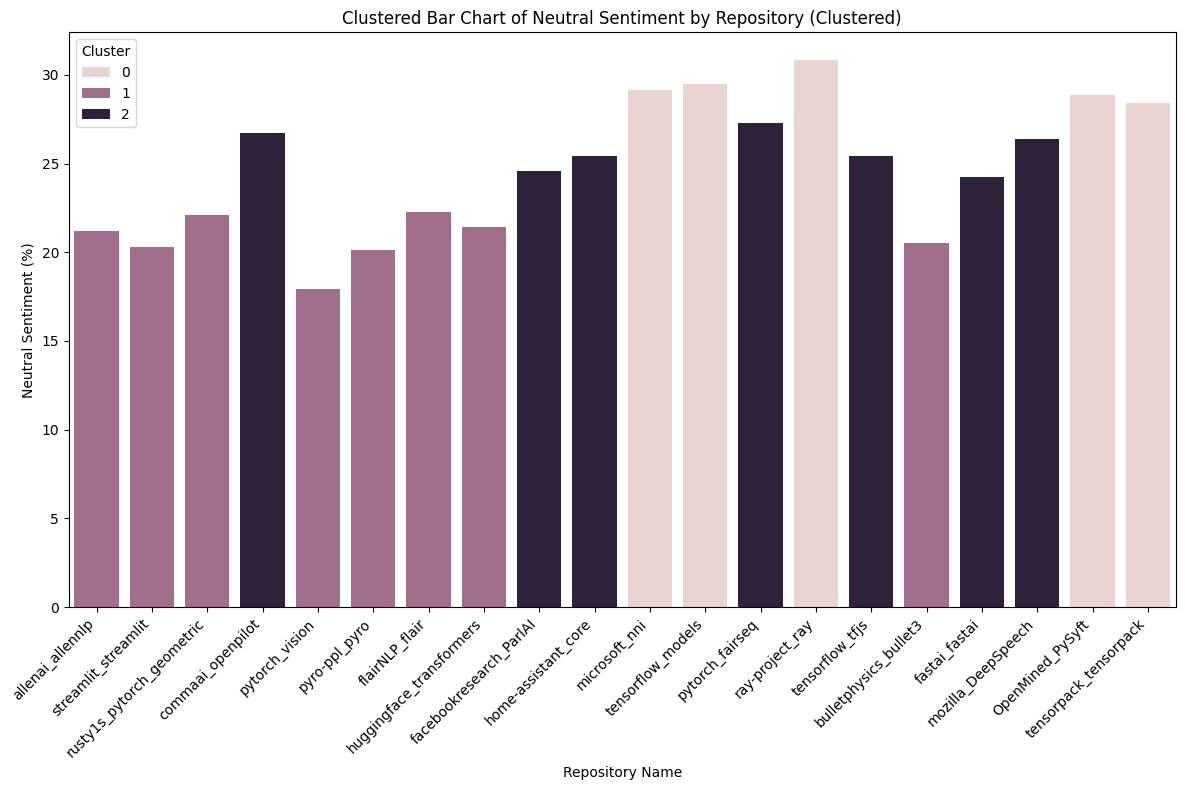

In [19]:
from sklearn.cluster import KMeans

# Define the sentiment metrics
sentiment_metrics = ['positive_sentiment', 'negative_sentiment', 'neutral_sentiment']

# Iterate over each sentiment metric
for metric in sentiment_metrics:
    # Clustering
    X = top_repos[[metric]]  # Use only the current sentiment metric
    kmeans = KMeans(n_clusters=3).fit(X)
    top_repos[f'{metric}_cluster'] = kmeans.labels_
    
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_repos, x='file_name', y=metric, hue=f'{metric}_cluster', dodge=False)
    plt.title(f'Clustered Bar Chart of {metric.replace("_", " ").title()} by Repository (Clustered)')
    plt.xlabel('Repository Name')
    plt.ylabel(f'{metric.replace("_", " ").title()} (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()


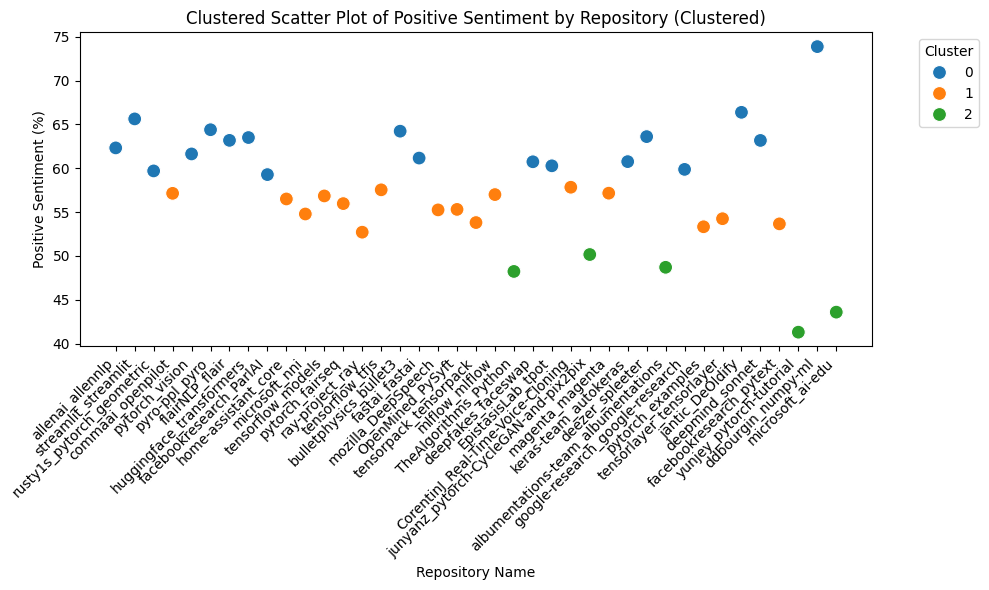

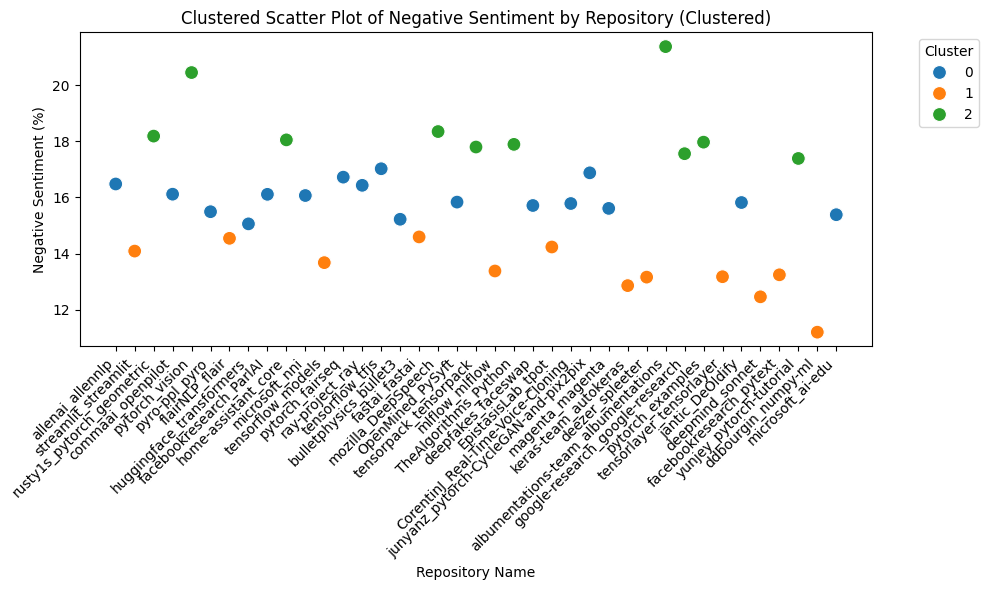

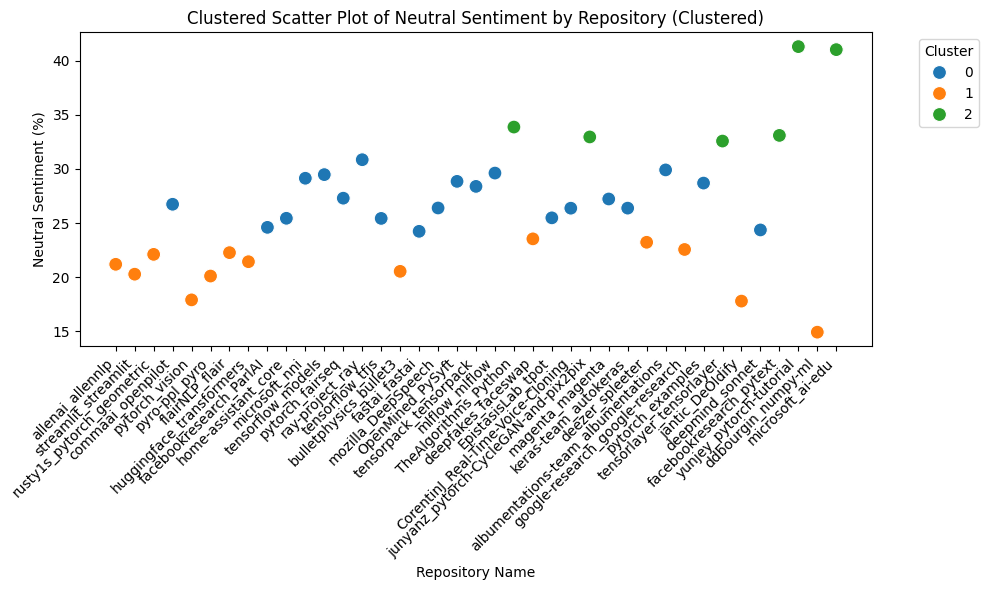

In [31]:
from sklearn.cluster import KMeans

# Define the sentiment metrics
sentiment_metrics = ['positive_sentiment', 'negative_sentiment', 'neutral_sentiment']

# Iterate over each sentiment metric
for metric in sentiment_metrics:
    # Clustering
    X = df[[metric]]  # Use only the current sentiment metric
    kmeans = KMeans(n_clusters=3).fit(X)
    df[f'{metric}_cluster'] = kmeans.labels_
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='file_name', y=metric, hue=f'{metric}_cluster', palette='tab10', s=100)
    plt.title(f'Clustered Scatter Plot of {metric.replace("_", " ").title()} by Repository (Clustered)')
    plt.xlabel('Repository Name')
    plt.ylabel(f'{metric.replace("_", " ").title()} (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\1038806826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['cluster'] = kmeans.labels_


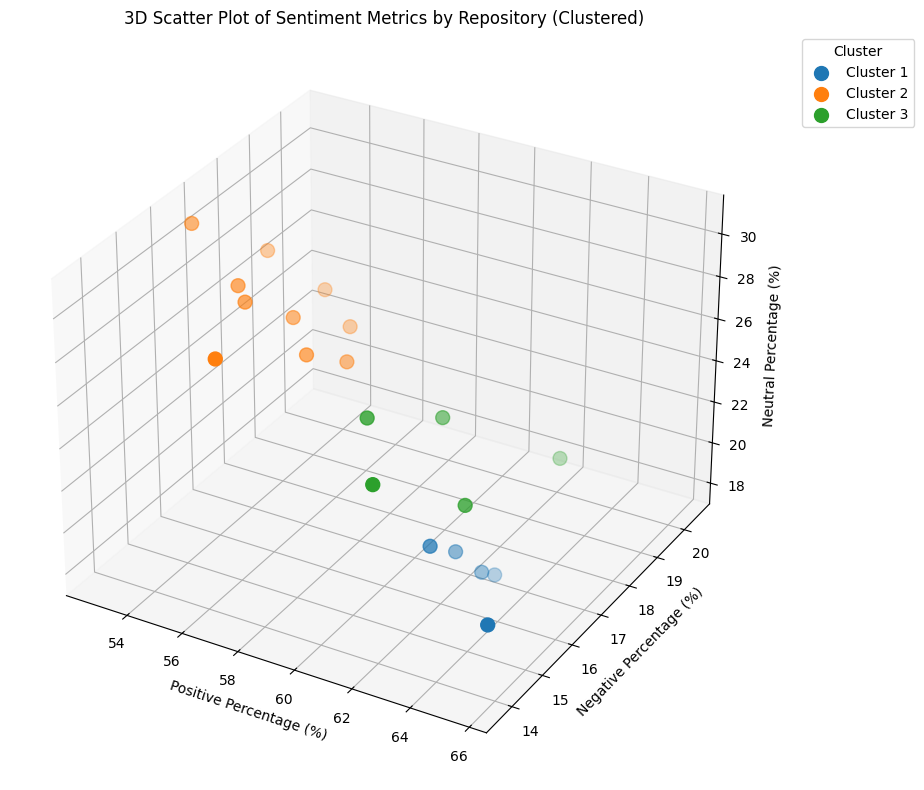

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Clustering
X = top_repos[sentiment_metrics]
kmeans = KMeans(n_clusters=3).fit(X)
top_repos['cluster'] = kmeans.labels_

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(3):
    cluster_df = top_repos[top_repos['cluster'] == cluster_label]
    ax.scatter(cluster_df['positive_sentiment'], cluster_df['negative_sentiment'], cluster_df['neutral_sentiment'], label=f'Cluster {cluster_label + 1}', s=100)

ax.set_xlabel('Positive Percentage (%)')
ax.set_ylabel('Negative Percentage (%)')
ax.set_zlabel('Neutral Percentage (%)')
ax.set_title('3D Scatter Plot of Sentiment Metrics by Repository (Clustered)')
ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\201192719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_repos['cluster'] = kmeans.labels_


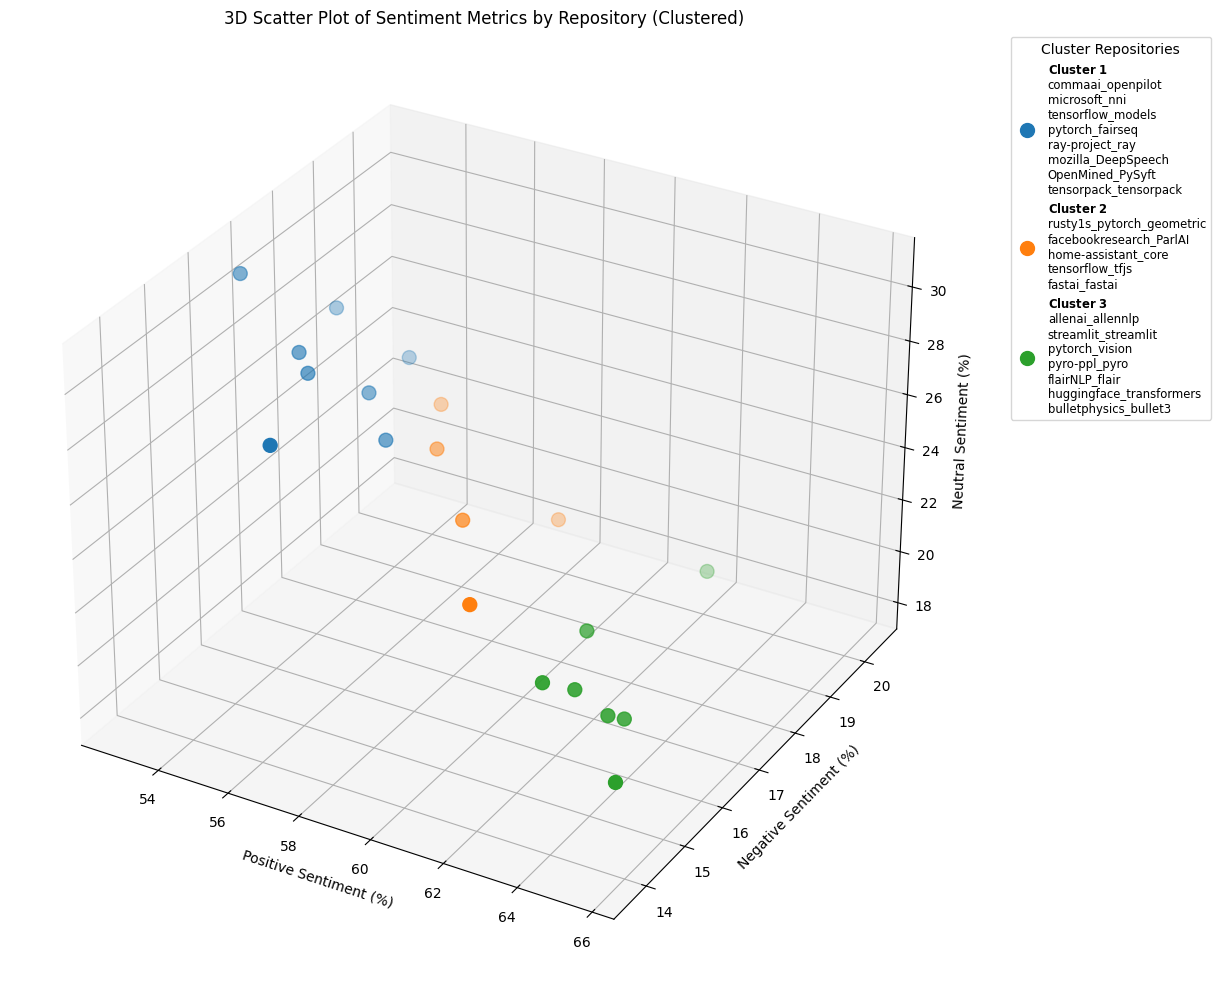

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Clustering
X = top_repos[sentiment_metrics]
kmeans = KMeans(n_clusters=3).fit(X)
top_repos['cluster'] = kmeans.labels_

# Plotting
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(3):
    cluster_df = top_repos[top_repos['cluster'] == cluster_label]
    ax.scatter(cluster_df['positive_sentiment'], cluster_df['negative_sentiment'], cluster_df['neutral_sentiment'], label=f'Cluster {cluster_label + 1}', s=100)


ax.set_xlabel('Positive Sentiment (%)')
ax.set_ylabel('Negative Sentiment (%)')
ax.set_zlabel('Neutral Sentiment (%)')
ax.set_title('3D Scatter Plot of Sentiment Metrics by Repository (Clustered)')

# Create a legend for repository names grouped by cluster
legend_entries = []
for cluster_label in range(3):
    cluster_repos = top_repos[top_repos['cluster'] == cluster_label]['file_name'].tolist()
    repo_names = "\n".join(cluster_repos)  # Include line breaks between repository names
    legend_entries.append(fr'$\bf{{Cluster\ {cluster_label + 1}}}$' + '\n' + repo_names)

plt.legend(title='Cluster Repositories', labels=legend_entries, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/3d_scatter_plot_clustered.png', dpi=1000)  # Save the plot with a suitable name
plt.show()


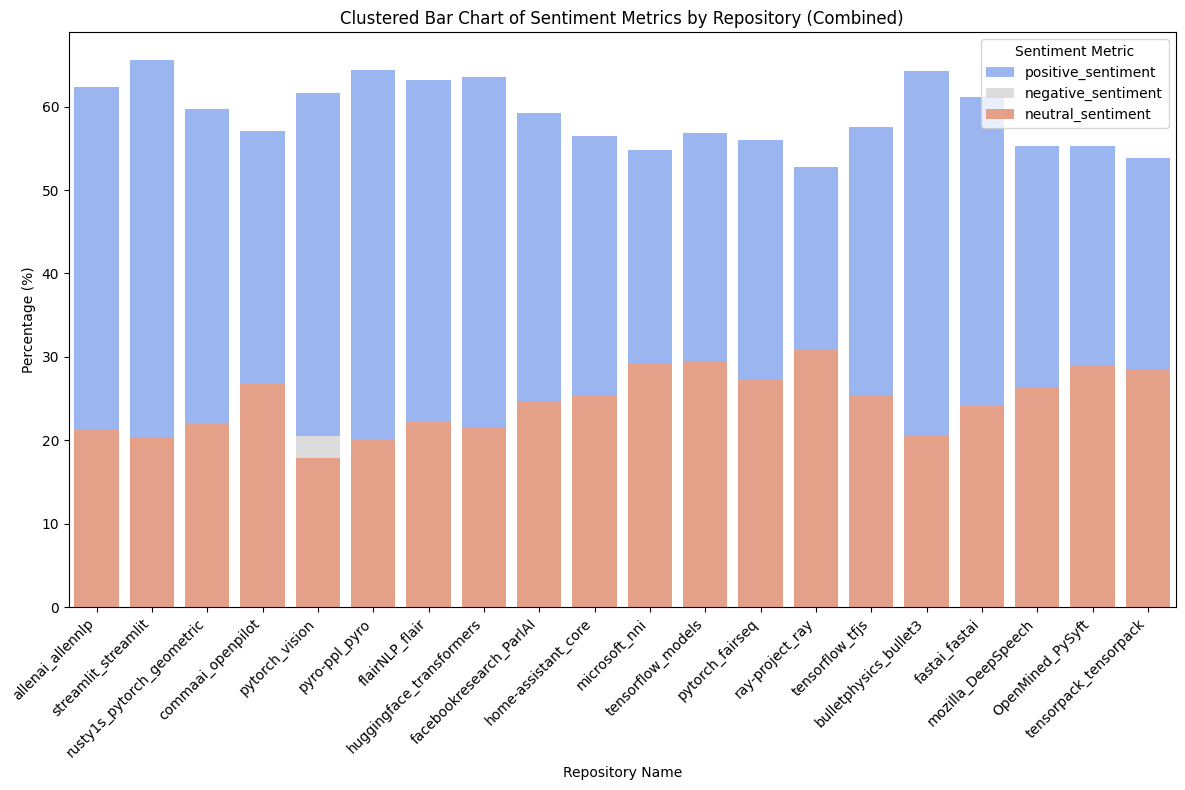

In [22]:
# Clustered Bar Chart for all sentiment metrics with clustering (combined)
plt.figure(figsize=(12, 8))

# Melt the DataFrame to combine positive, negative, and neutral percentages into one column
df_melted = top_repos.melt(id_vars=['file_name', 'cluster'], value_vars=['positive_sentiment', 'negative_sentiment', 'neutral_sentiment'], var_name='sentiment', value_name='percentage')

# Plotting the combined graph with hue as cluster
sns.barplot(data=df_melted, x='file_name', y='percentage', hue='sentiment', dodge=False, palette='coolwarm', hue_order=['positive_sentiment', 'negative_sentiment', 'neutral_sentiment'])

plt.title('Clustered Bar Chart of Sentiment Metrics by Repository (Combined)')
plt.xlabel('Repository Name')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Metric')
plt.tight_layout()
plt.show()


C:\Users\mdshoaibahmed\AppData\Local\Temp\ipykernel_40448\88336709.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=top_repos[sentiment_metrics], inner='point', scale='count')


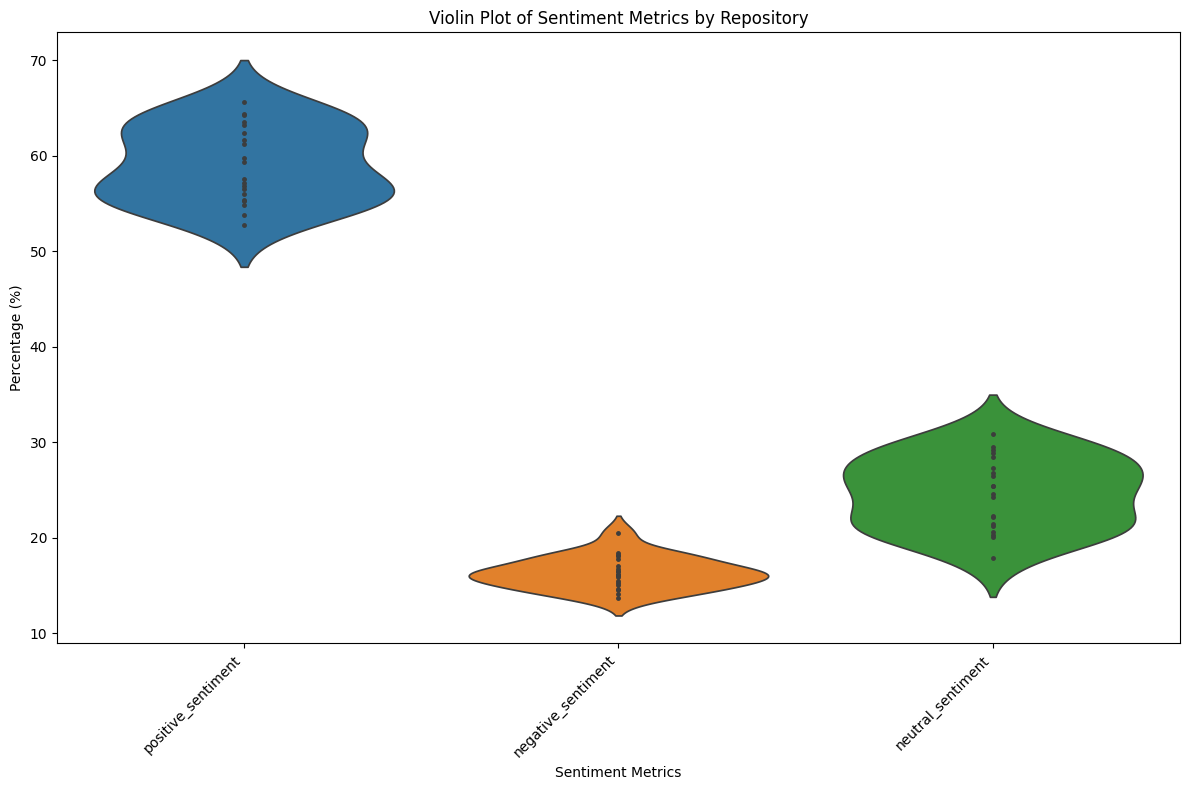

In [23]:

# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=top_repos[sentiment_metrics], inner='point', scale='count')
plt.title('Violin Plot of Sentiment Metrics by Repository')
plt.xlabel('Sentiment Metrics')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'{path_to_diagrms_folder}/violin_plot.png', dpi=500)
plt.show()


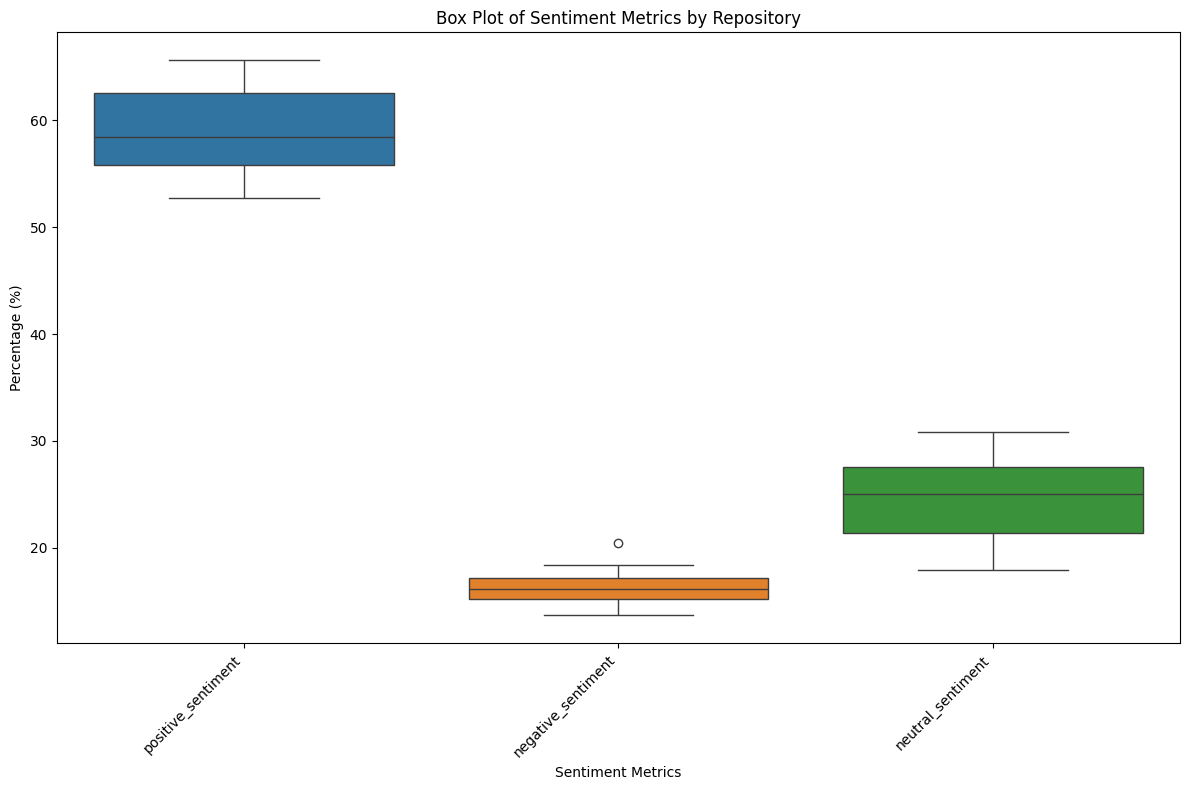

In [24]:


# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_repos[sentiment_metrics])
plt.title('Box Plot of Sentiment Metrics by Repository')
plt.xlabel('Sentiment Metrics')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [74]:
print(correlation_matrix)

                    positive_sentiment  negative_sentiment  neutral_sentiment  \
positive_sentiment            1.000000           -0.341796          -0.908451   
negative_sentiment           -0.341796            1.000000          -0.082314   
neutral_sentiment            -0.908451           -0.082314           1.000000   
bug                           0.263252           -0.053363          -0.255437   
security_hotspots            -0.321781            0.261948           0.224732   
code_smells                  -0.177008            0.180041           0.107634   
duplication                  -0.060945            0.164362          -0.008474   

                         bug  security_hotspots  code_smells  duplication  
positive_sentiment  0.263252          -0.321781    -0.177008    -0.060945  
negative_sentiment -0.053363           0.261948     0.180041     0.164362  
neutral_sentiment  -0.255437           0.224732     0.107634    -0.008474  
bug                 1.000000           0.094174

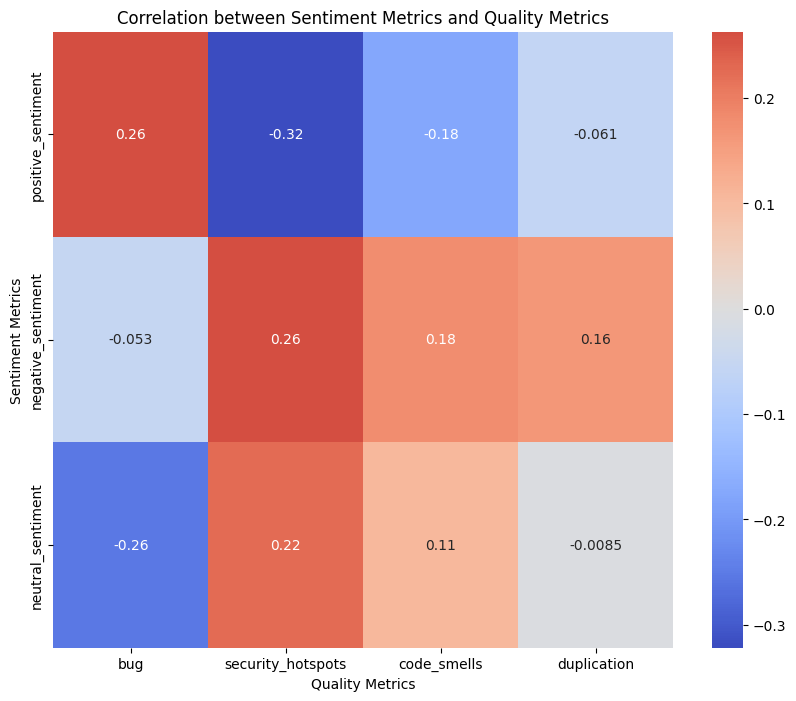

In [25]:
# Create the heatmap for sentiment metrics on the x-axis and quality metrics on the y-axis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.loc[sentiment_metrics, quality_metrics], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Sentiment Metrics and Quality Metrics')
plt.xlabel('Quality Metrics')
plt.ylabel('Sentiment Metrics')
plt.savefig(f'{path_to_diagrms_folder}/correlation_heatmap.png', dpi=500)
plt.show()

In [26]:
print(correlation_matrix.loc[sentiment_metrics, quality_metrics])

                         bug  security_hotspots  code_smells  duplication
positive_sentiment  0.263252          -0.321781    -0.177008    -0.060945
negative_sentiment -0.053363           0.261948     0.180041     0.164362
neutral_sentiment  -0.255437           0.224732     0.107634    -0.008474
